In [1]:
!git clone https://github.com/YizhongHu/rocket_circularization
!mv ./rocket_circularization/* ./

Cloning into 'rocket_circularization'...
remote: Enumerating objects: 405, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 405 (delta 20), reused 36 (delta 12), pack-reused 357
Receiving objects: 100% (405/405), 43.78 MiB | 9.83 MiB/s, done.
Resolving deltas: 100% (225/225), done.


In [2]:
import rocket_gym
from DQN import DeepQNetwork

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from IPython.display import FileLink

/kaggle/working/animation.py:217: DeprecationWarning: invalid escape sequence \h
  ax.set_title('Thrust Direction (Angle from $\hat{r}$)')
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:585: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.object,
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:637: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.bool,

2022-08-12 20:06:08.766988: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-12 20:06:08.854733: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-12 20:06:08.855565: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-12 20:06:08.857007: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 17,411
Trainable params: 17,411
Non-trainable params: 0
_________________________________________________________________
Episode: 0


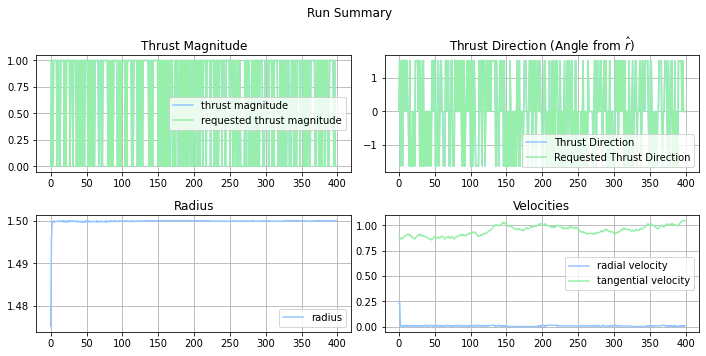

iters: 400, tot_rwd: -3.012e+02
Episode: 1
iters: 400, tot_rwd: -2.197e+02
Episode: 2
iters: 400, tot_rwd: -1.867e+02
Episode: 3
iters: 400, tot_rwd: -1.440e+02
Episode: 4
iters: 400, tot_rwd: -6.378e+01
Episode: 5
iters: 400, tot_rwd: -1.423e+02
Episode: 6
iters: 400, tot_rwd: -2.453e+02
Episode: 7
iters: 400, tot_rwd: -2.564e+02
Episode: 8
iters: 400, tot_rwd: -9.078e+01
Episode: 9
iters: 400, tot_rwd: -2.125e+02
Episode: 10
iters: 400, tot_rwd: -2.185e+02
Episode: 11
iters: 400, tot_rwd: -1.467e+02
Episode: 12
iters: 400, tot_rwd: -1.425e+02
Episode: 13
iters: 400, tot_rwd: -2.913e+02
Episode: 14
iters: 400, tot_rwd: -5.188e+01
Episode: 15
iters: 400, tot_rwd: -2.130e+02
Episode: 16
iters: 400, tot_rwd: -7.117e+01
Episode: 17
iters: 400, tot_rwd: -2.080e+02
Episode: 18
iters: 400, tot_rwd: -2.595e+02
Episode: 19
iters: 400, tot_rwd: -2.347e+02
Episode: 20
iters: 400, tot_rwd: -1.503e+02
Episode: 21
iters: 400, tot_rwd: -2.678e+02
Episode: 22
iters: 400, tot_rwd: -2.131e+02
Episode: 

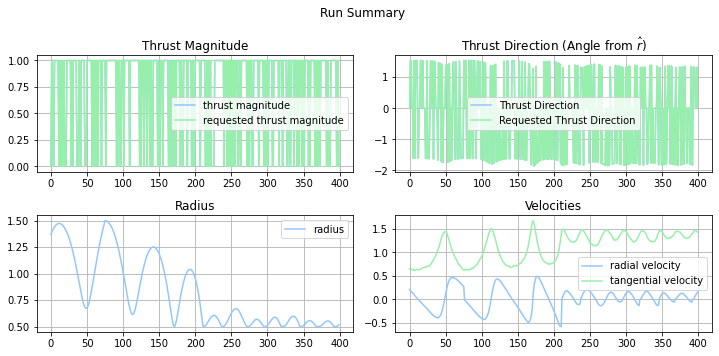

iters: 400, tot_rwd: -1.902e+02
Episode: 101
iters: 400, tot_rwd: -2.836e+02
Episode: 102
iters: 400, tot_rwd: -3.143e+02
Episode: 103
iters: 400, tot_rwd: -2.612e+02
Episode: 104
iters: 400, tot_rwd: -2.687e+02
Episode: 105
iters: 400, tot_rwd: -2.098e+02
Episode: 106
iters: 400, tot_rwd: -2.838e+02
Episode: 107
iters: 400, tot_rwd: -3.004e+02
Episode: 108
iters: 400, tot_rwd: -1.367e+02
Episode: 109
iters: 400, tot_rwd: -6.839e+02
Episode: 110
iters: 400, tot_rwd: -1.132e+02
Episode: 111
iters: 400, tot_rwd: -2.822e+02
Episode: 112
iters: 400, tot_rwd: -3.104e+02
Episode: 113
iters: 400, tot_rwd: -9.272e+01
Episode: 114
iters: 400, tot_rwd: -2.838e+02
Episode: 115
iters: 400, tot_rwd: -6.645e+01
Episode: 116
iters: 400, tot_rwd: -1.248e+02
Episode: 117
iters: 400, tot_rwd: -7.588e+02
Episode: 118
iters: 400, tot_rwd: -9.999e+01
Episode: 119
iters: 400, tot_rwd: -2.824e+02
Episode: 120
iters: 400, tot_rwd: -2.888e+02
Episode: 121
iters: 400, tot_rwd: -2.342e+02
Episode: 122
iters: 400

100%|██████████| 800/800 [00:25<00:00, 31.97it/s, loss=tf.Tensor(0.060952917, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.719e+02, lss: 6.095e-02
Episode: 129
iters: 400, tot_rwd: -2.835e+02
Episode: 130
iters: 400, tot_rwd: -2.986e+02
Episode: 131
iters: 400, tot_rwd: -2.756e+02
Episode: 132
iters: 400, tot_rwd: -1.976e+02
Episode: 133
iters: 400, tot_rwd: -1.314e+02
Episode: 134
iters: 400, tot_rwd: -2.857e+02
Episode: 135
iters: 400, tot_rwd: -9.177e+01
Episode: 136


100%|██████████| 800/800 [00:25<00:00, 31.30it/s, loss=tf.Tensor(3.1127708, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.698e+02, lss: 3.113e+00
Episode: 137
iters: 400, tot_rwd: -2.796e+02
Episode: 138
iters: 400, tot_rwd: -2.935e+02
Episode: 139
iters: 400, tot_rwd: -2.372e+02
Episode: 140
iters: 400, tot_rwd: -3.020e+02
Episode: 141
iters: 400, tot_rwd: -2.751e+02
Episode: 142
iters: 400, tot_rwd: -2.867e+02
Episode: 143
iters: 400, tot_rwd: -2.920e+02
Episode: 144


100%|██████████| 800/800 [00:26<00:00, 30.64it/s, loss=tf.Tensor(0.08986916, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.395e+02, lss: 8.987e-02
Episode: 145
iters: 400, tot_rwd: -3.064e+02
Episode: 146
iters: 400, tot_rwd: -2.911e+02
Episode: 147
iters: 400, tot_rwd: -2.969e+02
Episode: 148
iters: 400, tot_rwd: -2.653e+02
Episode: 149
iters: 400, tot_rwd: -2.880e+02
Episode: 150
iters: 400, tot_rwd: -2.646e+02
Episode: 151
iters: 400, tot_rwd: -3.141e+02
Episode: 152


100%|██████████| 800/800 [00:25<00:00, 31.23it/s, loss=tf.Tensor(0.08373228, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.426e+02, lss: 8.373e-02
Episode: 153
iters: 400, tot_rwd: -2.489e+02
Episode: 154
iters: 400, tot_rwd: -9.896e+01
Episode: 155
iters: 400, tot_rwd: -2.415e+02
Episode: 156
iters: 400, tot_rwd: -2.353e+02
Episode: 157
iters: 400, tot_rwd: -2.981e+02
Episode: 158
iters: 400, tot_rwd: -2.460e+02
Episode: 159
iters: 400, tot_rwd: -2.927e+02
Episode: 160


100%|██████████| 800/800 [00:25<00:00, 31.58it/s, loss=tf.Tensor(0.16424419, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.276e+02, lss: 1.642e-01
Episode: 161
iters: 400, tot_rwd: -2.853e+02
Episode: 162
iters: 400, tot_rwd: -3.048e+02
Episode: 163
iters: 400, tot_rwd: -2.860e+02
Episode: 164
iters: 400, tot_rwd: -2.848e+02
Episode: 165
iters: 400, tot_rwd: -2.796e+02
Episode: 166
iters: 400, tot_rwd: -2.918e+02
Episode: 167
iters: 400, tot_rwd: -2.541e+02
Episode: 168


100%|██████████| 800/800 [00:26<00:00, 30.40it/s, loss=tf.Tensor(0.48636943, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.972e+02, lss: 4.864e-01
Episode: 169
iters: 400, tot_rwd: -2.717e+02
Episode: 170
iters: 400, tot_rwd: -2.818e+02
Episode: 171
iters: 400, tot_rwd: -2.741e+02
Episode: 172
iters: 400, tot_rwd: -2.901e+02
Episode: 173
iters: 400, tot_rwd: -3.016e+02
Episode: 174
iters: 400, tot_rwd: -2.930e+02
Episode: 175
iters: 400, tot_rwd: -2.603e+02
Episode: 176


100%|██████████| 800/800 [00:26<00:00, 30.06it/s, loss=tf.Tensor(0.095708184, shape=(), dtype=float32)]


iters: 400, tot_rwd: -9.381e+01, lss: 9.571e-02
Episode: 177
iters: 400, tot_rwd: -3.017e+02
Episode: 178
iters: 400, tot_rwd: -2.762e+02
Episode: 179
iters: 400, tot_rwd: -1.784e+02
Episode: 180
iters: 400, tot_rwd: -2.769e+02
Episode: 181
iters: 400, tot_rwd: -3.020e+02
Episode: 182
iters: 400, tot_rwd: -3.000e+02
Episode: 183
iters: 400, tot_rwd: -2.654e+02
Episode: 184


100%|██████████| 800/800 [00:25<00:00, 30.91it/s, loss=tf.Tensor(0.3649193, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.835e+02, lss: 3.649e-01
Episode: 185
iters: 400, tot_rwd: -2.036e+02
Episode: 186
iters: 400, tot_rwd: -2.790e+02
Episode: 187
iters: 400, tot_rwd: -2.951e+02
Episode: 188
iters: 400, tot_rwd: -2.980e+02
Episode: 189
iters: 400, tot_rwd: -2.896e+02
Episode: 190
iters: 400, tot_rwd: -2.885e+02
Episode: 191
iters: 400, tot_rwd: -3.022e+02
Episode: 192


100%|██████████| 800/800 [00:27<00:00, 29.14it/s, loss=tf.Tensor(0.08727758, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.886e+02, lss: 8.728e-02
Episode: 193
iters: 400, tot_rwd: -3.010e+02
Episode: 194
iters: 400, tot_rwd: -2.978e+02
Episode: 195
iters: 400, tot_rwd: -2.794e+02
Episode: 196
iters: 400, tot_rwd: -2.369e+02
Episode: 197
iters: 400, tot_rwd: -2.983e+02
Episode: 198
iters: 400, tot_rwd: -3.001e+02
Episode: 199
iters: 400, tot_rwd: -2.474e+02
Episode: 200


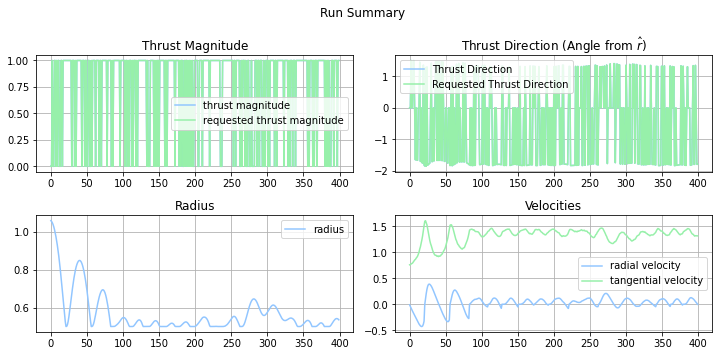

100%|██████████| 800/800 [00:26<00:00, 29.77it/s, loss=tf.Tensor(0.13735682, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.579e+02, lss: 1.374e-01
Episode: 201
iters: 400, tot_rwd: -2.916e+02
Episode: 202
iters: 400, tot_rwd: -3.034e+02
Episode: 203
iters: 400, tot_rwd: -2.511e+02
Episode: 204
iters: 400, tot_rwd: -2.263e+02
Episode: 205
iters: 400, tot_rwd: -2.272e+02
Episode: 206
iters: 400, tot_rwd: -3.011e+02
Episode: 207
iters: 400, tot_rwd: -2.963e+02
Episode: 208


100%|██████████| 800/800 [00:26<00:00, 29.70it/s, loss=tf.Tensor(0.3626771, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.877e+02, lss: 3.627e-01
Episode: 209
iters: 400, tot_rwd: -3.033e+02
Episode: 210
iters: 400, tot_rwd: -2.930e+02
Episode: 211
iters: 400, tot_rwd: -2.935e+02
Episode: 212
iters: 400, tot_rwd: -2.971e+02
Episode: 213
iters: 400, tot_rwd: -2.626e+02
Episode: 214
iters: 400, tot_rwd: -3.013e+02
Episode: 215
iters: 400, tot_rwd: -2.916e+02
Episode: 216


100%|██████████| 800/800 [00:26<00:00, 30.57it/s, loss=tf.Tensor(0.09321944, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.070e+02, lss: 9.322e-02
Episode: 217
iters: 400, tot_rwd: -2.104e+02
Episode: 218
iters: 400, tot_rwd: -2.636e+02
Episode: 219
iters: 400, tot_rwd: -1.129e+02
Episode: 220
iters: 400, tot_rwd: -2.554e+02
Episode: 221
iters: 400, tot_rwd: -2.951e+02
Episode: 222
iters: 400, tot_rwd: -2.980e+02
Episode: 223
iters: 400, tot_rwd: -9.481e+01
Episode: 224


100%|██████████| 800/800 [00:26<00:00, 29.83it/s, loss=tf.Tensor(0.052728422, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.351e+02, lss: 5.273e-02
Episode: 225
iters: 400, tot_rwd: -2.897e+02
Episode: 226
iters: 400, tot_rwd: -2.943e+02
Episode: 227
iters: 400, tot_rwd: -3.097e+02
Episode: 228
iters: 400, tot_rwd: -3.079e+02
Episode: 229
iters: 400, tot_rwd: -2.933e+02
Episode: 230
iters: 400, tot_rwd: -2.892e+02
Episode: 231
iters: 400, tot_rwd: -3.057e+02
Episode: 232


100%|██████████| 800/800 [00:26<00:00, 30.39it/s, loss=tf.Tensor(0.13450818, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.994e+02, lss: 1.345e-01
Episode: 233
iters: 400, tot_rwd: -1.293e+02
Episode: 234
iters: 400, tot_rwd: -1.105e+02
Episode: 235
iters: 400, tot_rwd: -1.562e+02
Episode: 236
iters: 400, tot_rwd: -1.058e+02
Episode: 237
iters: 400, tot_rwd: -2.157e+02
Episode: 238
iters: 400, tot_rwd: -1.513e+02
Episode: 239
iters: 400, tot_rwd: -3.169e+02
Episode: 240


100%|██████████| 800/800 [00:26<00:00, 30.73it/s, loss=tf.Tensor(1.8940554, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.132e+02, lss: 1.894e+00
Episode: 241
iters: 400, tot_rwd: -2.951e+02
Episode: 242
iters: 400, tot_rwd: -2.669e+02
Episode: 243
iters: 400, tot_rwd: -6.637e+02
Episode: 244
iters: 400, tot_rwd: -3.010e+02
Episode: 245
iters: 400, tot_rwd: -3.079e+02
Episode: 246
iters: 400, tot_rwd: -3.035e+02
Episode: 247
iters: 400, tot_rwd: -3.025e+02
Episode: 248


100%|██████████| 800/800 [00:26<00:00, 29.81it/s, loss=tf.Tensor(0.09204355, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.046e+02, lss: 9.204e-02
Episode: 249
iters: 400, tot_rwd: -2.877e+02
Episode: 250
iters: 400, tot_rwd: -2.615e+02
Episode: 251
iters: 400, tot_rwd: -2.669e+02
Episode: 252
iters: 400, tot_rwd: -2.567e+02
Episode: 253
iters: 400, tot_rwd: -2.262e+02
Episode: 254
iters: 400, tot_rwd: -1.072e+02
Episode: 255
iters: 400, tot_rwd: -2.166e+02
Episode: 256


100%|██████████| 800/800 [00:26<00:00, 29.63it/s, loss=tf.Tensor(0.08806449, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.251e+02, lss: 8.806e-02
Episode: 257
iters: 400, tot_rwd: -1.975e+02
Episode: 258
iters: 400, tot_rwd: -3.062e+02
Episode: 259
iters: 400, tot_rwd: -2.545e+02
Episode: 260
iters: 400, tot_rwd: -6.756e+01
Episode: 261
iters: 400, tot_rwd: -2.402e+02
Episode: 262
iters: 400, tot_rwd: -2.726e+02
Episode: 263
iters: 400, tot_rwd: -2.612e+02
Episode: 264


100%|██████████| 800/800 [00:26<00:00, 29.86it/s, loss=tf.Tensor(0.059990905, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.122e+02, lss: 5.999e-02
Episode: 265
iters: 400, tot_rwd: -1.172e+02
Episode: 266
iters: 400, tot_rwd: -1.954e+02
Episode: 267
iters: 400, tot_rwd: -1.545e+02
Episode: 268
iters: 400, tot_rwd: -3.048e+02
Episode: 269
iters: 400, tot_rwd: -1.460e+02
Episode: 270
iters: 400, tot_rwd: -3.171e+02
Episode: 271
iters: 400, tot_rwd: -1.224e+02
Episode: 272


100%|██████████| 800/800 [00:28<00:00, 28.32it/s, loss=tf.Tensor(0.17022456, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.972e+02, lss: 1.702e-01
Episode: 273
iters: 400, tot_rwd: -3.008e+02
Episode: 274
iters: 400, tot_rwd: -2.919e+02
Episode: 275
iters: 400, tot_rwd: -2.989e+02
Episode: 276
iters: 400, tot_rwd: -3.046e+02
Episode: 277
iters: 400, tot_rwd: -3.023e+02
Episode: 278
iters: 400, tot_rwd: -3.031e+02
Episode: 279
iters: 400, tot_rwd: -3.046e+02
Episode: 280


100%|██████████| 800/800 [00:27<00:00, 29.39it/s, loss=tf.Tensor(0.075280204, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.047e+02, lss: 7.528e-02
Episode: 281
iters: 400, tot_rwd: -8.445e+01
Episode: 282
iters: 400, tot_rwd: -6.932e+02
Episode: 283
iters: 400, tot_rwd: -3.163e+02
Episode: 284
iters: 400, tot_rwd: -2.956e+02
Episode: 285
iters: 400, tot_rwd: -2.543e+02
Episode: 286
iters: 400, tot_rwd: -2.024e+02
Episode: 287
iters: 400, tot_rwd: -2.147e+02
Episode: 288


100%|██████████| 800/800 [00:27<00:00, 29.35it/s, loss=tf.Tensor(0.12025724, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.649e+02, lss: 1.203e-01
Episode: 289
iters: 400, tot_rwd: -1.683e+02
Episode: 290
iters: 400, tot_rwd: -2.224e+02
Episode: 291
iters: 400, tot_rwd: -2.721e+02
Episode: 292
iters: 400, tot_rwd: -2.048e+02
Episode: 293
iters: 400, tot_rwd: -3.146e+02
Episode: 294
iters: 400, tot_rwd: -2.265e+02
Episode: 295
iters: 400, tot_rwd: -2.553e+02
Episode: 296


100%|██████████| 800/800 [00:27<00:00, 28.81it/s, loss=tf.Tensor(0.41919237, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.043e+02, lss: 4.192e-01
Episode: 297
iters: 400, tot_rwd: -2.884e+02
Episode: 298
iters: 400, tot_rwd: -3.037e+02
Episode: 299
iters: 400, tot_rwd: -2.006e+02
Episode: 300


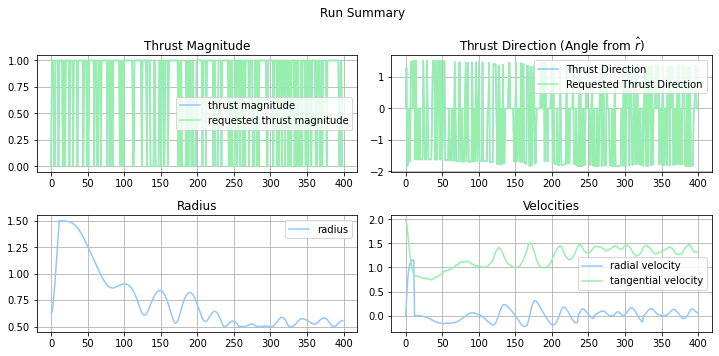

iters: 400, tot_rwd: -1.939e+02
Episode: 301
iters: 400, tot_rwd: -2.339e+02
Episode: 302
iters: 400, tot_rwd: -3.149e+02
Episode: 303
iters: 400, tot_rwd: -2.014e+02
Episode: 304


100%|██████████| 800/800 [00:27<00:00, 29.39it/s, loss=tf.Tensor(0.09254199, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.219e+02, lss: 9.254e-02
Episode: 305
iters: 400, tot_rwd: -2.924e+02
Episode: 306
iters: 400, tot_rwd: -3.078e+02
Episode: 307
iters: 400, tot_rwd: -2.975e+02
Episode: 308
iters: 400, tot_rwd: -2.508e+02
Episode: 309
iters: 400, tot_rwd: -2.940e+02
Episode: 310
iters: 400, tot_rwd: -3.072e+02
Episode: 311
iters: 400, tot_rwd: -2.105e+02
Episode: 312


100%|██████████| 800/800 [00:27<00:00, 29.02it/s, loss=tf.Tensor(0.07742356, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.431e+02, lss: 7.742e-02
Episode: 313
iters: 400, tot_rwd: -3.050e+02
Episode: 314
iters: 400, tot_rwd: -1.906e+02
Episode: 315
iters: 400, tot_rwd: -2.333e+02
Episode: 316
iters: 400, tot_rwd: -1.980e+02
Episode: 317
iters: 400, tot_rwd: -2.987e+02
Episode: 318
iters: 400, tot_rwd: -1.644e+02
Episode: 319
iters: 400, tot_rwd: -2.105e+02
Episode: 320


100%|██████████| 800/800 [00:27<00:00, 29.02it/s, loss=tf.Tensor(0.056431897, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.122e+02, lss: 5.643e-02
Episode: 321
iters: 400, tot_rwd: -2.271e+02
Episode: 322
iters: 400, tot_rwd: -1.180e+02
Episode: 323
iters: 400, tot_rwd: -1.337e+02
Episode: 324
iters: 400, tot_rwd: -1.566e+02
Episode: 325
iters: 400, tot_rwd: -2.708e+02
Episode: 326
iters: 400, tot_rwd: -1.155e+02
Episode: 327
iters: 400, tot_rwd: -2.354e+02
Episode: 328


100%|██████████| 800/800 [00:27<00:00, 29.11it/s, loss=tf.Tensor(0.1893194, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.225e+02, lss: 1.893e-01
Episode: 329
iters: 400, tot_rwd: -2.875e+02
Episode: 330
iters: 400, tot_rwd: -3.026e+02
Episode: 331
iters: 400, tot_rwd: -2.094e+02
Episode: 332
iters: 400, tot_rwd: -3.014e+02
Episode: 333
iters: 400, tot_rwd: -2.811e+02
Episode: 334
iters: 400, tot_rwd: -2.621e+02
Episode: 335
iters: 400, tot_rwd: -1.766e+02
Episode: 336


100%|██████████| 800/800 [00:28<00:00, 28.16it/s, loss=tf.Tensor(0.07478218, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.046e+02, lss: 7.478e-02
Episode: 337
iters: 400, tot_rwd: -2.530e+02
Episode: 338
iters: 400, tot_rwd: -3.396e+02
Episode: 339
iters: 400, tot_rwd: -2.384e+02
Episode: 340
iters: 400, tot_rwd: -2.231e+02
Episode: 341
iters: 400, tot_rwd: -2.076e+02
Episode: 342
iters: 400, tot_rwd: -3.305e+02
Episode: 343
iters: 400, tot_rwd: -2.707e+02
Episode: 344


100%|██████████| 800/800 [00:27<00:00, 28.79it/s, loss=tf.Tensor(0.40459192, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.346e+02, lss: 4.046e-01
Episode: 345
iters: 400, tot_rwd: -1.810e+02
Episode: 346
iters: 400, tot_rwd: -2.688e+02
Episode: 347
iters: 400, tot_rwd: -2.319e+02
Episode: 348
iters: 400, tot_rwd: -2.239e+02
Episode: 349
iters: 400, tot_rwd: -2.473e+02
Episode: 350
iters: 400, tot_rwd: -3.105e+02
Episode: 351
iters: 400, tot_rwd: -1.928e+02
Episode: 352


100%|██████████| 800/800 [00:27<00:00, 28.76it/s, loss=tf.Tensor(0.06152376, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.095e+02, lss: 6.152e-02
Episode: 353
iters: 400, tot_rwd: -1.823e+02
Episode: 354
iters: 400, tot_rwd: -2.067e+02
Episode: 355
iters: 400, tot_rwd: -2.051e+02
Episode: 356
iters: 400, tot_rwd: -1.619e+02
Episode: 357
iters: 400, tot_rwd: -2.000e+02
Episode: 358
iters: 400, tot_rwd: -2.077e+02
Episode: 359
iters: 400, tot_rwd: -1.810e+02
Episode: 360


100%|██████████| 800/800 [00:27<00:00, 29.29it/s, loss=tf.Tensor(0.047548633, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.652e+02, lss: 4.755e-02
Episode: 361
iters: 400, tot_rwd: -3.269e+02
Episode: 362
iters: 400, tot_rwd: -1.956e+02
Episode: 363
iters: 400, tot_rwd: -1.477e+02
Episode: 364
iters: 400, tot_rwd: -3.110e+02
Episode: 365
iters: 400, tot_rwd: -1.876e+02
Episode: 366
iters: 400, tot_rwd: -1.016e+02
Episode: 367
iters: 400, tot_rwd: -2.069e+02
Episode: 368


100%|██████████| 800/800 [00:27<00:00, 28.81it/s, loss=tf.Tensor(0.18729451, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.756e+02, lss: 1.873e-01
Episode: 369
iters: 400, tot_rwd: -1.461e+02
Episode: 370
iters: 400, tot_rwd: -1.334e+02
Episode: 371
iters: 400, tot_rwd: -1.259e+02
Episode: 372
iters: 400, tot_rwd: -1.137e+02
Episode: 373
iters: 400, tot_rwd: -1.507e+02
Episode: 374
iters: 400, tot_rwd: -1.199e+02
Episode: 375
iters: 400, tot_rwd: -1.208e+02
Episode: 376


100%|██████████| 800/800 [00:27<00:00, 28.94it/s, loss=tf.Tensor(0.063357055, shape=(), dtype=float32)]


iters: 400, tot_rwd: -7.702e+01, lss: 6.336e-02
Episode: 377
iters: 400, tot_rwd: -1.536e+02
Episode: 378
iters: 400, tot_rwd: -1.485e+02
Episode: 379
iters: 400, tot_rwd: -1.881e+02
Episode: 380
iters: 400, tot_rwd: -1.316e+02
Episode: 381
iters: 400, tot_rwd: -1.326e+02
Episode: 382
iters: 400, tot_rwd: -1.416e+02
Episode: 383
iters: 400, tot_rwd: -3.250e+02
Episode: 384


100%|██████████| 800/800 [00:27<00:00, 29.43it/s, loss=tf.Tensor(0.059058614, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.814e+02, lss: 5.906e-02
Episode: 385
iters: 400, tot_rwd: -2.972e+02
Episode: 386
iters: 400, tot_rwd: -1.571e+02
Episode: 387
iters: 400, tot_rwd: -1.417e+02
Episode: 388
iters: 400, tot_rwd: -3.006e+02
Episode: 389
iters: 400, tot_rwd: -1.275e+02
Episode: 390
iters: 400, tot_rwd: -2.771e+02
Episode: 391
iters: 400, tot_rwd: -1.680e+02
Episode: 392


100%|██████████| 800/800 [00:26<00:00, 29.67it/s, loss=tf.Tensor(0.10635796, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.313e+02, lss: 1.064e-01
Episode: 393
iters: 400, tot_rwd: -1.742e+02
Episode: 394
iters: 400, tot_rwd: -9.685e+01
Episode: 395
iters: 400, tot_rwd: -1.201e+02
Episode: 396
iters: 400, tot_rwd: -1.079e+02
Episode: 397
iters: 400, tot_rwd: -9.865e+01
Episode: 398
iters: 400, tot_rwd: -1.576e+02
Episode: 399
iters: 400, tot_rwd: -1.128e+02
Episode: 400


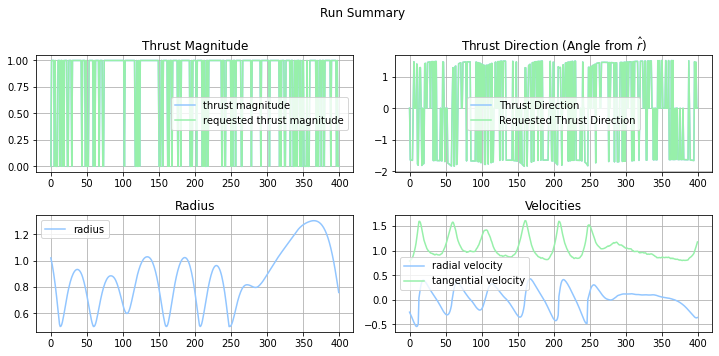

100%|██████████| 800/800 [00:27<00:00, 28.95it/s, loss=tf.Tensor(0.11118116, shape=(), dtype=float32)]


iters: 400, tot_rwd: -8.788e+01, lss: 1.112e-01
Episode: 401
iters: 400, tot_rwd: -1.500e+02
Episode: 402
iters: 400, tot_rwd: -1.499e+02
Episode: 403
iters: 400, tot_rwd: -1.374e+02
Episode: 404
iters: 400, tot_rwd: -1.627e+02
Episode: 405
iters: 400, tot_rwd: -1.666e+02
Episode: 406
iters: 400, tot_rwd: -1.366e+02
Episode: 407
iters: 400, tot_rwd: -1.567e+02
Episode: 408


100%|██████████| 800/800 [00:27<00:00, 29.09it/s, loss=tf.Tensor(0.06922419, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.545e+02, lss: 6.922e-02
Episode: 409
iters: 400, tot_rwd: -1.719e+02
Episode: 410
iters: 400, tot_rwd: -7.234e+02
Episode: 411
iters: 400, tot_rwd: -1.484e+02
Episode: 412
iters: 400, tot_rwd: -1.356e+02
Episode: 413
iters: 400, tot_rwd: -1.090e+02
Episode: 414
iters: 400, tot_rwd: -1.254e+02
Episode: 415
iters: 400, tot_rwd: -1.180e+02
Episode: 416


100%|██████████| 800/800 [00:28<00:00, 28.38it/s, loss=tf.Tensor(0.067052886, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.486e+02, lss: 6.705e-02
Episode: 417
iters: 400, tot_rwd: -1.517e+02
Episode: 418
iters: 400, tot_rwd: -1.497e+02
Episode: 419
iters: 400, tot_rwd: -1.461e+02
Episode: 420
iters: 400, tot_rwd: -1.257e+02
Episode: 421
iters: 400, tot_rwd: -1.311e+02
Episode: 422
iters: 400, tot_rwd: -1.449e+02
Episode: 423
iters: 400, tot_rwd: -1.406e+02
Episode: 424


100%|██████████| 800/800 [00:27<00:00, 28.66it/s, loss=tf.Tensor(3.1234536, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.583e+02, lss: 3.123e+00
Episode: 425
iters: 400, tot_rwd: -3.404e+02
Episode: 426
iters: 400, tot_rwd: -1.479e+02
Episode: 427
iters: 400, tot_rwd: -3.486e+02
Episode: 428
iters: 400, tot_rwd: -1.422e+02
Episode: 429
iters: 400, tot_rwd: -1.507e+02
Episode: 430
iters: 400, tot_rwd: -1.418e+02
Episode: 431
iters: 400, tot_rwd: -1.604e+02
Episode: 432


100%|██████████| 800/800 [00:28<00:00, 28.42it/s, loss=tf.Tensor(0.051765304, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.501e+02, lss: 5.177e-02
Episode: 433
iters: 400, tot_rwd: -1.727e+02
Episode: 434
iters: 400, tot_rwd: -1.337e+02
Episode: 435
iters: 400, tot_rwd: -1.551e+02
Episode: 436
iters: 400, tot_rwd: -1.352e+02
Episode: 437
iters: 400, tot_rwd: -1.359e+02
Episode: 438
iters: 400, tot_rwd: -1.663e+02
Episode: 439
iters: 400, tot_rwd: -1.343e+02
Episode: 440


100%|██████████| 800/800 [00:27<00:00, 28.59it/s, loss=tf.Tensor(0.09248985, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.579e+02, lss: 9.249e-02
Episode: 441
iters: 400, tot_rwd: -1.598e+02
Episode: 442
iters: 400, tot_rwd: -1.415e+02
Episode: 443
iters: 400, tot_rwd: -1.344e+02
Episode: 444
iters: 400, tot_rwd: -1.668e+02
Episode: 445
iters: 400, tot_rwd: -1.571e+02
Episode: 446
iters: 400, tot_rwd: -1.434e+02
Episode: 447
iters: 400, tot_rwd: -1.569e+02
Episode: 448


100%|██████████| 800/800 [00:28<00:00, 28.25it/s, loss=tf.Tensor(0.074988276, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.521e+02, lss: 7.499e-02
Episode: 449
iters: 400, tot_rwd: -1.730e+02
Episode: 450
iters: 400, tot_rwd: -1.283e+02
Episode: 451
iters: 400, tot_rwd: -1.359e+02
Episode: 452
iters: 400, tot_rwd: -1.422e+02
Episode: 453
iters: 400, tot_rwd: -1.504e+02
Episode: 454
iters: 400, tot_rwd: -1.621e+02
Episode: 455
iters: 400, tot_rwd: -1.678e+02
Episode: 456


100%|██████████| 800/800 [00:28<00:00, 28.07it/s, loss=tf.Tensor(1.246651, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.446e+02, lss: 1.247e+00
Episode: 457
iters: 400, tot_rwd: -1.907e+02
Episode: 458
iters: 400, tot_rwd: -1.600e+02
Episode: 459
iters: 400, tot_rwd: -1.317e+02
Episode: 460
iters: 400, tot_rwd: -1.439e+02
Episode: 461
iters: 400, tot_rwd: -1.427e+02
Episode: 462
iters: 400, tot_rwd: -1.451e+02
Episode: 463
iters: 400, tot_rwd: -1.308e+02
Episode: 464


100%|██████████| 800/800 [00:28<00:00, 27.83it/s, loss=tf.Tensor(0.13367727, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.362e+02, lss: 1.337e-01
Episode: 465
iters: 400, tot_rwd: -3.377e+02
Episode: 466
iters: 400, tot_rwd: -2.585e+02
Episode: 467
iters: 400, tot_rwd: -3.627e+02
Episode: 468
iters: 400, tot_rwd: -3.378e+02
Episode: 469
iters: 400, tot_rwd: -3.463e+02
Episode: 470
iters: 400, tot_rwd: -1.472e+02
Episode: 471
iters: 400, tot_rwd: -2.572e+02
Episode: 472


100%|██████████| 800/800 [00:27<00:00, 28.58it/s, loss=tf.Tensor(0.07068236, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.699e+02, lss: 7.068e-02
Episode: 473
iters: 400, tot_rwd: -1.266e+02
Episode: 474
iters: 400, tot_rwd: -1.774e+02
Episode: 475
iters: 400, tot_rwd: -1.454e+02
Episode: 476
iters: 400, tot_rwd: -1.390e+02
Episode: 477
iters: 400, tot_rwd: -2.209e+02
Episode: 478
iters: 400, tot_rwd: -1.389e+02
Episode: 479
iters: 400, tot_rwd: -1.537e+02
Episode: 480


100%|██████████| 800/800 [00:28<00:00, 28.12it/s, loss=tf.Tensor(0.10760716, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.698e+02, lss: 1.076e-01
Episode: 481
iters: 400, tot_rwd: -1.644e+02
Episode: 482
iters: 400, tot_rwd: -1.528e+02
Episode: 483
iters: 400, tot_rwd: -1.340e+02
Episode: 484
iters: 400, tot_rwd: -1.446e+02
Episode: 485
iters: 400, tot_rwd: -1.224e+02
Episode: 486
iters: 400, tot_rwd: -1.267e+02
Episode: 487
iters: 400, tot_rwd: -1.454e+02
Episode: 488


100%|██████████| 800/800 [00:28<00:00, 28.17it/s, loss=tf.Tensor(0.3228811, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.409e+02, lss: 3.229e-01
Episode: 489
iters: 400, tot_rwd: -1.512e+02
Episode: 490
iters: 400, tot_rwd: -1.173e+02
Episode: 491
iters: 400, tot_rwd: -1.353e+02
Episode: 492
iters: 400, tot_rwd: -1.488e+02
Episode: 493
iters: 400, tot_rwd: -1.202e+02
Episode: 494
iters: 400, tot_rwd: -1.486e+02
Episode: 495
iters: 400, tot_rwd: -1.113e+02
Episode: 496


100%|██████████| 800/800 [00:28<00:00, 28.03it/s, loss=tf.Tensor(0.11146496, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.340e+02, lss: 1.115e-01
Episode: 497
iters: 400, tot_rwd: -1.582e+02
Episode: 498
iters: 400, tot_rwd: -1.856e+02
Episode: 499
iters: 400, tot_rwd: -1.099e+02
Episode: 500


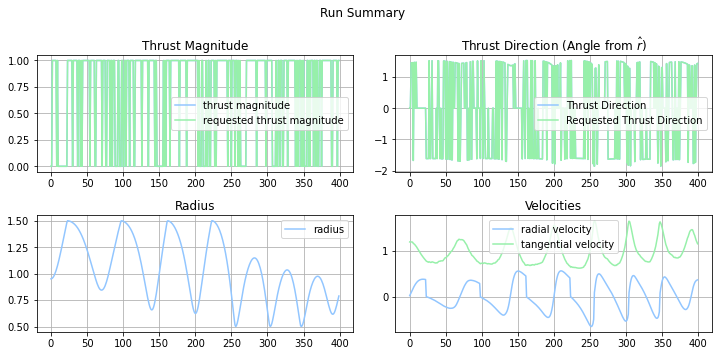

iters: 400, tot_rwd: -1.242e+02
Episode: 501
iters: 400, tot_rwd: -1.144e+02
Episode: 502
iters: 400, tot_rwd: -1.512e+02
Episode: 503
iters: 400, tot_rwd: -1.432e+02
Episode: 504


100%|██████████| 800/800 [00:28<00:00, 27.79it/s, loss=tf.Tensor(0.0547167, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.094e+02, lss: 5.472e-02
Episode: 505
iters: 400, tot_rwd: -1.384e+02
Episode: 506
iters: 400, tot_rwd: -1.479e+02
Episode: 507
iters: 400, tot_rwd: -1.439e+02
Episode: 508
iters: 400, tot_rwd: -1.286e+02
Episode: 509
iters: 400, tot_rwd: -1.376e+02
Episode: 510
iters: 400, tot_rwd: -1.645e+02
Episode: 511
iters: 400, tot_rwd: -1.267e+02
Episode: 512


100%|██████████| 800/800 [00:28<00:00, 27.94it/s, loss=tf.Tensor(0.081854835, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.752e+02, lss: 8.185e-02
Episode: 513
iters: 400, tot_rwd: -1.227e+02
Episode: 514
iters: 400, tot_rwd: -1.438e+02
Episode: 515
iters: 400, tot_rwd: -1.430e+02
Episode: 516
iters: 400, tot_rwd: -1.581e+02
Episode: 517
iters: 400, tot_rwd: -1.246e+02
Episode: 518
iters: 400, tot_rwd: -1.615e+02
Episode: 519
iters: 400, tot_rwd: -1.237e+02
Episode: 520


100%|██████████| 800/800 [00:27<00:00, 29.30it/s, loss=tf.Tensor(0.09060316, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.440e+02, lss: 9.060e-02
Episode: 521
iters: 400, tot_rwd: -1.462e+02
Episode: 522
iters: 400, tot_rwd: -1.615e+02
Episode: 523
iters: 400, tot_rwd: -1.331e+02
Episode: 524
iters: 400, tot_rwd: -1.322e+02
Episode: 525
iters: 400, tot_rwd: -1.775e+02
Episode: 526
iters: 400, tot_rwd: -1.429e+02
Episode: 527
iters: 400, tot_rwd: -1.507e+02
Episode: 528


100%|██████████| 800/800 [00:27<00:00, 29.36it/s, loss=tf.Tensor(0.04631409, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.286e+02, lss: 4.631e-02
Episode: 529
iters: 400, tot_rwd: -1.657e+02
Episode: 530
iters: 400, tot_rwd: -1.425e+02
Episode: 531
iters: 400, tot_rwd: -1.636e+02
Episode: 532
iters: 400, tot_rwd: -1.553e+02
Episode: 533
iters: 400, tot_rwd: -7.073e+02
Episode: 534
iters: 400, tot_rwd: -1.237e+02
Episode: 535
iters: 400, tot_rwd: -1.795e+02
Episode: 536


100%|██████████| 800/800 [00:27<00:00, 29.62it/s, loss=tf.Tensor(0.07375878, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.552e+02, lss: 7.376e-02
Episode: 537
iters: 400, tot_rwd: -1.205e+02
Episode: 538
iters: 400, tot_rwd: -1.381e+02
Episode: 539
iters: 400, tot_rwd: -1.120e+02
Episode: 540
iters: 400, tot_rwd: -1.555e+02
Episode: 541
iters: 400, tot_rwd: -1.377e+02
Episode: 542
iters: 400, tot_rwd: -1.315e+02
Episode: 543
iters: 400, tot_rwd: -1.389e+02
Episode: 544


100%|██████████| 800/800 [00:29<00:00, 27.41it/s, loss=tf.Tensor(0.029807635, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.354e+02, lss: 2.981e-02
Episode: 545
iters: 400, tot_rwd: -1.586e+02
Episode: 546
iters: 400, tot_rwd: -1.355e+02
Episode: 547
iters: 400, tot_rwd: -1.654e+02
Episode: 548
iters: 400, tot_rwd: -1.395e+02
Episode: 549
iters: 400, tot_rwd: -1.412e+02
Episode: 550
iters: 400, tot_rwd: -1.417e+02
Episode: 551
iters: 400, tot_rwd: -1.346e+02
Episode: 552


100%|██████████| 800/800 [00:31<00:00, 25.71it/s, loss=tf.Tensor(0.025708696, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.618e+02, lss: 2.571e-02
Episode: 553
iters: 400, tot_rwd: -1.362e+02
Episode: 554
iters: 400, tot_rwd: -1.587e+02
Episode: 555
iters: 400, tot_rwd: -1.198e+02
Episode: 556
iters: 400, tot_rwd: -1.500e+02
Episode: 557
iters: 400, tot_rwd: -1.233e+02
Episode: 558
iters: 400, tot_rwd: -1.566e+02
Episode: 559
iters: 400, tot_rwd: -1.376e+02
Episode: 560


100%|██████████| 800/800 [00:29<00:00, 27.37it/s, loss=tf.Tensor(0.3785957, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.266e+02, lss: 3.786e-01
Episode: 561
iters: 400, tot_rwd: -1.620e+02
Episode: 562
iters: 400, tot_rwd: -1.298e+02
Episode: 563
iters: 400, tot_rwd: -1.250e+02
Episode: 564
iters: 400, tot_rwd: -1.756e+02
Episode: 565
iters: 400, tot_rwd: -1.286e+02
Episode: 566
iters: 400, tot_rwd: -1.524e+02
Episode: 567
iters: 400, tot_rwd: -1.547e+02
Episode: 568


100%|██████████| 800/800 [00:28<00:00, 28.46it/s, loss=tf.Tensor(0.026004933, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.255e+02, lss: 2.600e-02
Episode: 569
iters: 400, tot_rwd: -1.495e+02
Episode: 570
iters: 400, tot_rwd: -1.497e+02
Episode: 571
iters: 400, tot_rwd: -1.386e+02
Episode: 572
iters: 400, tot_rwd: -1.467e+02
Episode: 573
iters: 400, tot_rwd: -1.408e+02
Episode: 574
iters: 400, tot_rwd: -1.243e+02
Episode: 575
iters: 400, tot_rwd: -1.417e+02
Episode: 576


100%|██████████| 800/800 [00:28<00:00, 28.30it/s, loss=tf.Tensor(0.046643764, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.364e+02, lss: 4.664e-02
Episode: 577
iters: 400, tot_rwd: -1.360e+02
Episode: 578
iters: 400, tot_rwd: -1.140e+02
Episode: 579
iters: 400, tot_rwd: -1.611e+02
Episode: 580
iters: 400, tot_rwd: -1.280e+02
Episode: 581
iters: 400, tot_rwd: -1.451e+02
Episode: 582
iters: 400, tot_rwd: -1.599e+02
Episode: 583
iters: 400, tot_rwd: -1.149e+02
Episode: 584


100%|██████████| 800/800 [00:29<00:00, 27.53it/s, loss=tf.Tensor(0.021159805, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.605e+02, lss: 2.116e-02
Episode: 585
iters: 400, tot_rwd: -1.780e+02
Episode: 586
iters: 400, tot_rwd: -1.476e+02
Episode: 587
iters: 400, tot_rwd: -1.620e+02
Episode: 588
iters: 400, tot_rwd: -1.301e+02
Episode: 589
iters: 400, tot_rwd: -1.448e+02
Episode: 590
iters: 400, tot_rwd: -1.486e+02
Episode: 591
iters: 400, tot_rwd: -1.523e+02
Episode: 592


100%|██████████| 800/800 [00:29<00:00, 27.50it/s, loss=tf.Tensor(0.025998399, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.453e+02, lss: 2.600e-02
Episode: 593
iters: 400, tot_rwd: -1.573e+02
Episode: 594
iters: 400, tot_rwd: -1.543e+02
Episode: 595
iters: 400, tot_rwd: -1.172e+02
Episode: 596
iters: 400, tot_rwd: -1.238e+02
Episode: 597
iters: 400, tot_rwd: -1.380e+02
Episode: 598
iters: 400, tot_rwd: -1.429e+02
Episode: 599
iters: 400, tot_rwd: -1.744e+02
Episode: 600


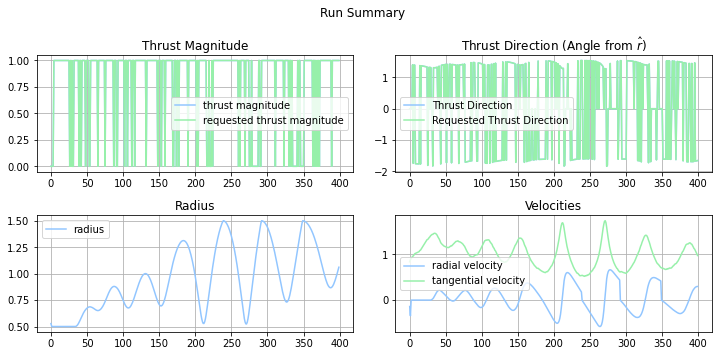

100%|██████████| 800/800 [00:29<00:00, 27.52it/s, loss=tf.Tensor(0.040645666, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.345e+02, lss: 4.065e-02
Episode: 601
iters: 400, tot_rwd: -1.454e+02
Episode: 602
iters: 400, tot_rwd: -1.368e+02
Episode: 603
iters: 400, tot_rwd: -1.083e+02
Episode: 604
iters: 400, tot_rwd: -1.521e+02
Episode: 605
iters: 400, tot_rwd: -1.512e+02
Episode: 606
iters: 400, tot_rwd: -1.411e+02
Episode: 607
iters: 400, tot_rwd: -1.370e+02
Episode: 608


100%|██████████| 800/800 [00:28<00:00, 28.03it/s, loss=tf.Tensor(0.029186506, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.409e+02, lss: 2.919e-02
Episode: 609
iters: 400, tot_rwd: -1.564e+02
Episode: 610
iters: 400, tot_rwd: -1.838e+02
Episode: 611
iters: 400, tot_rwd: -1.536e+02
Episode: 612
iters: 400, tot_rwd: -1.704e+02
Episode: 613
iters: 400, tot_rwd: -1.667e+02
Episode: 614
iters: 400, tot_rwd: -1.802e+02
Episode: 615
iters: 400, tot_rwd: -1.558e+02
Episode: 616


100%|██████████| 800/800 [00:28<00:00, 27.62it/s, loss=tf.Tensor(0.031157156, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.652e+02, lss: 3.116e-02
Episode: 617
iters: 400, tot_rwd: -9.863e+01
Episode: 618
iters: 400, tot_rwd: -1.224e+02
Episode: 619
iters: 400, tot_rwd: -1.533e+02
Episode: 620
iters: 400, tot_rwd: -1.223e+02
Episode: 621
iters: 400, tot_rwd: -1.194e+02
Episode: 622
iters: 400, tot_rwd: -1.184e+02
Episode: 623
iters: 400, tot_rwd: -1.211e+02
Episode: 624


100%|██████████| 800/800 [00:28<00:00, 27.64it/s, loss=tf.Tensor(0.13576737, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.159e+02, lss: 1.358e-01
Episode: 625
iters: 400, tot_rwd: -1.583e+02
Episode: 626
iters: 400, tot_rwd: -1.475e+02
Episode: 627
iters: 400, tot_rwd: -1.840e+02
Episode: 628
iters: 400, tot_rwd: -1.575e+02
Episode: 629
iters: 400, tot_rwd: -1.783e+02
Episode: 630
iters: 400, tot_rwd: -1.710e+02
Episode: 631
iters: 400, tot_rwd: -1.627e+02
Episode: 632


100%|██████████| 800/800 [00:28<00:00, 28.28it/s, loss=tf.Tensor(0.020267922, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.526e+02, lss: 2.027e-02
Episode: 633
iters: 400, tot_rwd: -1.133e+02
Episode: 634
iters: 400, tot_rwd: -2.268e+02
Episode: 635
iters: 400, tot_rwd: -1.232e+02
Episode: 636
iters: 400, tot_rwd: -1.739e+02
Episode: 637
iters: 400, tot_rwd: -9.457e+01
Episode: 638
iters: 400, tot_rwd: -2.887e+02
Episode: 639
iters: 400, tot_rwd: -1.679e+02
Episode: 640


100%|██████████| 800/800 [00:29<00:00, 27.53it/s, loss=tf.Tensor(0.018921455, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.005e+02, lss: 1.892e-02
Episode: 641
iters: 400, tot_rwd: -1.300e+02
Episode: 642
iters: 400, tot_rwd: -1.467e+02
Episode: 643
iters: 400, tot_rwd: -1.271e+02
Episode: 644
iters: 400, tot_rwd: -1.012e+02
Episode: 645
iters: 400, tot_rwd: -1.240e+02
Episode: 646
iters: 400, tot_rwd: -1.255e+02
Episode: 647
iters: 400, tot_rwd: -1.567e+02
Episode: 648


100%|██████████| 800/800 [00:29<00:00, 26.76it/s, loss=tf.Tensor(0.034264486, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.096e+02, lss: 3.426e-02
Episode: 649
iters: 400, tot_rwd: -1.185e+02
Episode: 650
iters: 400, tot_rwd: -1.043e+02
Episode: 651
iters: 400, tot_rwd: -1.165e+02
Episode: 652
iters: 400, tot_rwd: -1.498e+02
Episode: 653
iters: 400, tot_rwd: -1.248e+02
Episode: 654
iters: 400, tot_rwd: -1.546e+02
Episode: 655
iters: 400, tot_rwd: -1.476e+02
Episode: 656


100%|██████████| 800/800 [00:30<00:00, 26.08it/s, loss=tf.Tensor(0.019986592, shape=(), dtype=float32)]


iters: 400, tot_rwd: -9.604e+01, lss: 1.999e-02
Episode: 657
iters: 400, tot_rwd: -1.301e+02
Episode: 658
iters: 400, tot_rwd: -1.156e+02
Episode: 659
iters: 400, tot_rwd: -1.111e+02
Episode: 660
iters: 400, tot_rwd: -1.094e+02
Episode: 661
iters: 400, tot_rwd: -1.472e+02
Episode: 662
iters: 400, tot_rwd: -1.046e+02
Episode: 663
iters: 400, tot_rwd: -1.420e+02
Episode: 664


100%|██████████| 800/800 [00:29<00:00, 27.38it/s, loss=tf.Tensor(0.029156707, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.294e+02, lss: 2.916e-02
Episode: 665
iters: 400, tot_rwd: -1.150e+02
Episode: 666
iters: 400, tot_rwd: -1.639e+02
Episode: 667
iters: 400, tot_rwd: -1.303e+02
Episode: 668
iters: 400, tot_rwd: -1.450e+02
Episode: 669
iters: 400, tot_rwd: -1.092e+02
Episode: 670
iters: 400, tot_rwd: -1.045e+02
Episode: 671
iters: 400, tot_rwd: -1.141e+02
Episode: 672


100%|██████████| 800/800 [00:29<00:00, 27.22it/s, loss=tf.Tensor(0.020901453, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.547e+02, lss: 2.090e-02
Episode: 673
iters: 400, tot_rwd: -1.338e+02
Episode: 674
iters: 400, tot_rwd: -9.123e+01
Episode: 675
iters: 400, tot_rwd: -1.399e+02
Episode: 676
iters: 400, tot_rwd: -1.029e+02
Episode: 677
iters: 400, tot_rwd: -1.349e+02
Episode: 678
iters: 400, tot_rwd: -1.367e+02
Episode: 679
iters: 400, tot_rwd: -9.588e+01
Episode: 680


100%|██████████| 800/800 [00:27<00:00, 29.07it/s, loss=tf.Tensor(0.23841117, shape=(), dtype=float32)]


iters: 400, tot_rwd: -9.423e+01, lss: 2.384e-01
Episode: 681
iters: 400, tot_rwd: -1.342e+02
Episode: 682
iters: 400, tot_rwd: -8.737e+01
Episode: 683
iters: 400, tot_rwd: -1.279e+02
Episode: 684
iters: 400, tot_rwd: -1.029e+02
Episode: 685
iters: 400, tot_rwd: -8.315e+01
Episode: 686
iters: 400, tot_rwd: -1.228e+02
Episode: 687
iters: 400, tot_rwd: -1.162e+02
Episode: 688


100%|██████████| 800/800 [00:27<00:00, 28.91it/s, loss=tf.Tensor(0.06581598, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.310e+02, lss: 6.582e-02
Episode: 689
iters: 400, tot_rwd: -2.294e+02
Episode: 690
iters: 400, tot_rwd: -1.730e+02
Episode: 691
iters: 400, tot_rwd: -1.768e+02
Episode: 692
iters: 400, tot_rwd: -1.589e+02
Episode: 693
iters: 400, tot_rwd: -2.930e+02
Episode: 694
iters: 400, tot_rwd: -2.450e+02
Episode: 695
iters: 400, tot_rwd: -2.648e+02
Episode: 696


100%|██████████| 800/800 [00:27<00:00, 28.97it/s, loss=tf.Tensor(0.06769279, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.927e+02, lss: 6.769e-02
Episode: 697
iters: 400, tot_rwd: -1.489e+02
Episode: 698
iters: 400, tot_rwd: -1.344e+02
Episode: 699
iters: 400, tot_rwd: -9.997e+01
Episode: 700


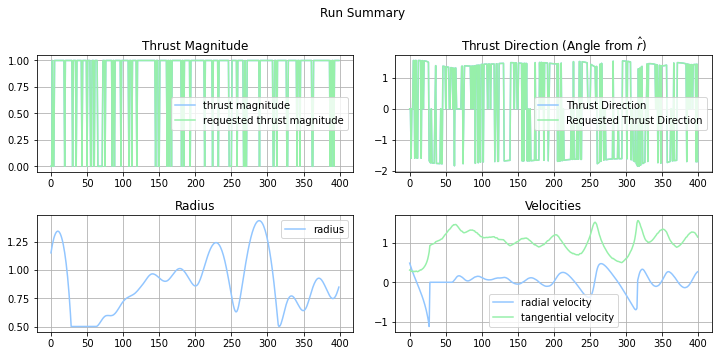

iters: 400, tot_rwd: -1.119e+02
Episode: 701
iters: 400, tot_rwd: -1.335e+02
Episode: 702
iters: 400, tot_rwd: -1.006e+02
Episode: 703
iters: 400, tot_rwd: -1.293e+02
Episode: 704


100%|██████████| 800/800 [00:29<00:00, 27.56it/s, loss=tf.Tensor(2.2789211, shape=(), dtype=float32)]


iters: 400, tot_rwd: -9.373e+01, lss: 2.279e+00
Episode: 705
iters: 400, tot_rwd: -1.176e+02
Episode: 706
iters: 400, tot_rwd: -1.290e+02
Episode: 707
iters: 400, tot_rwd: -1.113e+02
Episode: 708
iters: 400, tot_rwd: -9.090e+01
Episode: 709
iters: 400, tot_rwd: -1.050e+02
Episode: 710
iters: 400, tot_rwd: -1.482e+02
Episode: 711
iters: 400, tot_rwd: -1.351e+02
Episode: 712


100%|██████████| 800/800 [00:29<00:00, 26.74it/s, loss=tf.Tensor(0.050561875, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.060e+02, lss: 5.056e-02
Episode: 713
iters: 400, tot_rwd: -9.559e+01
Episode: 714
iters: 400, tot_rwd: -9.599e+01
Episode: 715
iters: 400, tot_rwd: -8.018e+01
Episode: 716
iters: 400, tot_rwd: -9.923e+01
Episode: 717
iters: 400, tot_rwd: -1.403e+02
Episode: 718
iters: 400, tot_rwd: -8.722e+01
Episode: 719
iters: 400, tot_rwd: -1.317e+02
Episode: 720


100%|██████████| 800/800 [00:31<00:00, 25.34it/s, loss=tf.Tensor(0.018417092, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.329e+02, lss: 1.842e-02
Episode: 721
iters: 400, tot_rwd: -1.390e+02
Episode: 722
iters: 400, tot_rwd: -1.041e+02
Episode: 723
iters: 400, tot_rwd: -8.988e+01
Episode: 724
iters: 400, tot_rwd: -9.320e+01
Episode: 725
iters: 400, tot_rwd: -1.187e+02
Episode: 726
iters: 400, tot_rwd: -1.445e+02
Episode: 727
iters: 400, tot_rwd: -1.104e+02
Episode: 728


100%|██████████| 800/800 [00:28<00:00, 27.87it/s, loss=tf.Tensor(0.048910603, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.372e+02, lss: 4.891e-02
Episode: 729
iters: 400, tot_rwd: -9.651e+01
Episode: 730
iters: 400, tot_rwd: -1.493e+02
Episode: 731
iters: 400, tot_rwd: -1.143e+02
Episode: 732
iters: 400, tot_rwd: -1.249e+02
Episode: 733
iters: 400, tot_rwd: -9.024e+01
Episode: 734
iters: 400, tot_rwd: -1.129e+02
Episode: 735
iters: 400, tot_rwd: -1.533e+02
Episode: 736


100%|██████████| 800/800 [00:31<00:00, 25.37it/s, loss=tf.Tensor(0.028566433, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.106e+02, lss: 2.857e-02
Episode: 737
iters: 400, tot_rwd: -8.033e+01
Episode: 738
iters: 400, tot_rwd: -1.414e+02
Episode: 739
iters: 400, tot_rwd: -1.030e+02
Episode: 740
iters: 400, tot_rwd: -1.107e+02
Episode: 741
iters: 400, tot_rwd: -7.729e+01
Episode: 742
iters: 400, tot_rwd: -1.286e+02
Episode: 743
iters: 400, tot_rwd: -1.351e+02
Episode: 744


100%|██████████| 800/800 [00:29<00:00, 27.45it/s, loss=tf.Tensor(0.012093746, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.246e+02, lss: 1.209e-02
Episode: 745
iters: 400, tot_rwd: -1.133e+02
Episode: 746
iters: 400, tot_rwd: -1.191e+02
Episode: 747
iters: 400, tot_rwd: -9.903e+01
Episode: 748
iters: 400, tot_rwd: -1.187e+02
Episode: 749
iters: 400, tot_rwd: -1.116e+02
Episode: 750
iters: 400, tot_rwd: -1.342e+02
Episode: 751
iters: 400, tot_rwd: -1.377e+02
Episode: 752


100%|██████████| 800/800 [00:30<00:00, 26.18it/s, loss=tf.Tensor(0.6502413, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.433e+02, lss: 6.502e-01
Episode: 753
iters: 400, tot_rwd: -1.072e+02
Episode: 754
iters: 400, tot_rwd: -8.646e+01
Episode: 755
iters: 400, tot_rwd: -1.029e+02
Episode: 756
iters: 400, tot_rwd: -1.085e+02
Episode: 757
iters: 400, tot_rwd: -1.095e+02
Episode: 758
iters: 400, tot_rwd: -9.774e+01
Episode: 759
iters: 400, tot_rwd: -1.122e+02
Episode: 760


100%|██████████| 800/800 [00:27<00:00, 28.88it/s, loss=tf.Tensor(0.05657584, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.076e+02, lss: 5.658e-02
Episode: 761
iters: 400, tot_rwd: -1.330e+02
Episode: 762
iters: 400, tot_rwd: -1.375e+02
Episode: 763
iters: 400, tot_rwd: -1.014e+02
Episode: 764
iters: 400, tot_rwd: -9.207e+01
Episode: 765
iters: 400, tot_rwd: -8.724e+01
Episode: 766
iters: 400, tot_rwd: -1.359e+02
Episode: 767
iters: 400, tot_rwd: -1.230e+02
Episode: 768


100%|██████████| 800/800 [00:30<00:00, 26.62it/s, loss=tf.Tensor(0.019748496, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.151e+02, lss: 1.975e-02
Episode: 769
iters: 400, tot_rwd: -1.396e+02
Episode: 770
iters: 400, tot_rwd: -1.131e+02
Episode: 771
iters: 400, tot_rwd: -1.328e+02
Episode: 772
iters: 400, tot_rwd: -1.449e+02
Episode: 773
iters: 400, tot_rwd: -1.278e+02
Episode: 774
iters: 400, tot_rwd: -1.136e+02
Episode: 775
iters: 400, tot_rwd: -1.388e+02
Episode: 776


100%|██████████| 800/800 [00:26<00:00, 30.19it/s, loss=tf.Tensor(0.016103208, shape=(), dtype=float32)]


iters: 400, tot_rwd: -8.240e+01, lss: 1.610e-02
Episode: 777
iters: 400, tot_rwd: -1.135e+02
Episode: 778
iters: 400, tot_rwd: -1.025e+02
Episode: 779
iters: 400, tot_rwd: -1.048e+02
Episode: 780
iters: 400, tot_rwd: -1.164e+02
Episode: 781
iters: 400, tot_rwd: -1.049e+02
Episode: 782
iters: 400, tot_rwd: -1.063e+02
Episode: 783
iters: 400, tot_rwd: -1.141e+02
Episode: 784


100%|██████████| 800/800 [00:29<00:00, 26.69it/s, loss=tf.Tensor(0.017992243, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.150e+02, lss: 1.799e-02
Episode: 785
iters: 400, tot_rwd: -7.283e+01
Episode: 786
iters: 400, tot_rwd: -4.456e+01
Episode: 787
iters: 400, tot_rwd: -4.965e+01
Episode: 788
iters: 400, tot_rwd: -4.431e+01
Episode: 789
iters: 400, tot_rwd: -9.455e+01
Episode: 790
iters: 400, tot_rwd: -6.103e+01
Episode: 791
iters: 400, tot_rwd: -1.070e+02
Episode: 792


100%|██████████| 800/800 [00:26<00:00, 29.87it/s, loss=tf.Tensor(0.018433778, shape=(), dtype=float32)]


iters: 400, tot_rwd: -7.102e+01, lss: 1.843e-02
Episode: 793
iters: 400, tot_rwd: -1.386e+02
Episode: 794
iters: 400, tot_rwd: -9.992e+01
Episode: 795
iters: 400, tot_rwd: -1.186e+02
Episode: 796
iters: 400, tot_rwd: -1.287e+02
Episode: 797
iters: 400, tot_rwd: -1.093e+02
Episode: 798
iters: 400, tot_rwd: -1.300e+02
Episode: 799
iters: 400, tot_rwd: -1.345e+02
Episode: 800


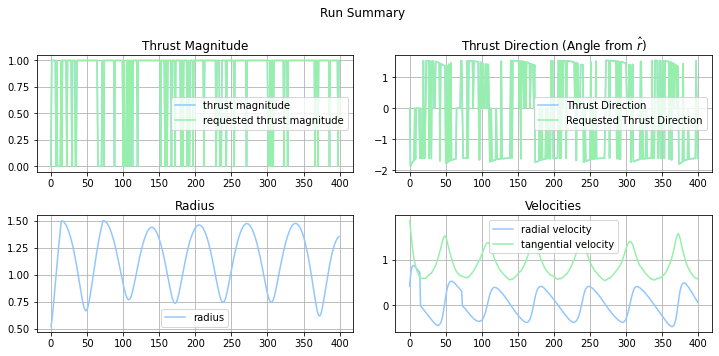

100%|██████████| 800/800 [00:30<00:00, 26.15it/s, loss=tf.Tensor(0.019263316, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.295e+02, lss: 1.926e-02
Episode: 801
iters: 400, tot_rwd: -7.642e+01
Episode: 802
iters: 400, tot_rwd: -7.940e+01
Episode: 803
iters: 400, tot_rwd: -8.262e+01
Episode: 804
iters: 400, tot_rwd: -9.271e+01
Episode: 805
iters: 400, tot_rwd: -9.966e+01
Episode: 806
iters: 400, tot_rwd: -1.061e+02
Episode: 807
iters: 400, tot_rwd: -9.552e+01
Episode: 808


100%|██████████| 800/800 [00:27<00:00, 28.82it/s, loss=tf.Tensor(0.020021014, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.066e+02, lss: 2.002e-02
Episode: 809
iters: 400, tot_rwd: -8.685e+01
Episode: 810
iters: 400, tot_rwd: -7.153e+01
Episode: 811
iters: 400, tot_rwd: -2.875e+01
Episode: 812
iters: 400, tot_rwd: -5.905e+01
Episode: 813
iters: 400, tot_rwd: -8.295e+01
Episode: 814
iters: 400, tot_rwd: -6.384e+01
Episode: 815
iters: 400, tot_rwd: -6.288e+01
Episode: 816


100%|██████████| 800/800 [00:29<00:00, 26.82it/s, loss=tf.Tensor(0.019849177, shape=(), dtype=float32)]


iters: 400, tot_rwd: -5.365e+01, lss: 1.985e-02
Episode: 817
iters: 400, tot_rwd: -9.645e+01
Episode: 818
iters: 400, tot_rwd: -9.435e+01
Episode: 819
iters: 400, tot_rwd: -9.719e+01
Episode: 820
iters: 400, tot_rwd: -8.389e+01
Episode: 821
iters: 400, tot_rwd: -8.453e+01
Episode: 822
iters: 400, tot_rwd: -3.636e+01
Episode: 823
iters: 400, tot_rwd: -8.001e+01
Episode: 824


100%|██████████| 800/800 [00:26<00:00, 30.01it/s, loss=tf.Tensor(0.038808048, shape=(), dtype=float32)]


iters: 400, tot_rwd: -6.540e+01, lss: 3.881e-02
Episode: 825
iters: 400, tot_rwd: -6.812e+01
Episode: 826
iters: 400, tot_rwd: -1.005e+02
Episode: 827
iters: 400, tot_rwd: -5.860e+01
Episode: 828
iters: 400, tot_rwd: -5.620e+01
Episode: 829
iters: 400, tot_rwd: -1.078e+02
Episode: 830
iters: 400, tot_rwd: -3.006e+02
Episode: 831
iters: 400, tot_rwd: -6.651e+01
Episode: 832


100%|██████████| 800/800 [00:29<00:00, 26.67it/s, loss=tf.Tensor(0.03697781, shape=(), dtype=float32)]


iters: 400, tot_rwd: -8.601e+01, lss: 3.698e-02
Episode: 833
iters: 400, tot_rwd: -1.124e+02
Episode: 834
iters: 400, tot_rwd: -1.139e+02
Episode: 835
iters: 400, tot_rwd: -4.920e+01
Episode: 836
iters: 400, tot_rwd: -1.111e+02
Episode: 837
iters: 400, tot_rwd: -1.002e+02
Episode: 838
iters: 400, tot_rwd: -7.865e+01
Episode: 839
iters: 400, tot_rwd: -9.196e+01
Episode: 840


100%|██████████| 800/800 [00:27<00:00, 29.39it/s, loss=tf.Tensor(0.07533252, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.249e+02, lss: 7.533e-02
Episode: 841
iters: 400, tot_rwd: -8.396e+01
Episode: 842
iters: 400, tot_rwd: -4.339e+01
Episode: 843
iters: 400, tot_rwd: -5.070e+01
Episode: 844
iters: 400, tot_rwd: -5.650e+01
Episode: 845
iters: 400, tot_rwd: -9.092e+01
Episode: 846
iters: 400, tot_rwd: -7.073e+01
Episode: 847
iters: 400, tot_rwd: -7.133e+01
Episode: 848


100%|██████████| 800/800 [00:30<00:00, 26.39it/s, loss=tf.Tensor(0.013543956, shape=(), dtype=float32)]


iters: 400, tot_rwd: -9.261e+01, lss: 1.354e-02
Episode: 849
iters: 400, tot_rwd: -5.648e+01
Episode: 850
iters: 400, tot_rwd: -5.319e+00
Episode: 851
iters: 400, tot_rwd: -3.628e+01
Episode: 852
iters: 400, tot_rwd: -7.527e+01
Episode: 853
iters: 400, tot_rwd: -4.009e+01
Episode: 854
iters: 400, tot_rwd: -8.011e+01
Episode: 855
iters: 400, tot_rwd: -7.264e+01
Episode: 856


100%|██████████| 800/800 [00:27<00:00, 29.19it/s, loss=tf.Tensor(0.06705366, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.095e+01, lss: 6.705e-02
Episode: 857
iters: 400, tot_rwd: -7.492e+01
Episode: 858
iters: 400, tot_rwd: -4.088e+01
Episode: 859
iters: 400, tot_rwd: -7.129e+01
Episode: 860
iters: 400, tot_rwd: -4.381e+01
Episode: 861
iters: 400, tot_rwd: -7.434e+01
Episode: 862
iters: 400, tot_rwd: -2.556e+01
Episode: 863
iters: 400, tot_rwd: -6.288e+01
Episode: 864


100%|██████████| 800/800 [00:31<00:00, 25.48it/s, loss=tf.Tensor(0.20955051, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.960e+01, lss: 2.096e-01
Episode: 865
iters: 400, tot_rwd: -4.109e+01
Episode: 866
iters: 400, tot_rwd: -3.834e+01
Episode: 867
iters: 400, tot_rwd: -3.793e+01
Episode: 868
iters: 400, tot_rwd: -9.520e+01
Episode: 869
iters: 400, tot_rwd: -2.914e+01
Episode: 870
iters: 400, tot_rwd: -6.739e+01
Episode: 871
iters: 400, tot_rwd: -1.134e+01
Episode: 872


100%|██████████| 800/800 [00:27<00:00, 28.93it/s, loss=tf.Tensor(0.0075904997, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.415e+01, lss: 7.590e-03
Episode: 873
iters: 400, tot_rwd: -5.196e+01
Episode: 874
iters: 400, tot_rwd: -6.501e+01
Episode: 875
iters: 400, tot_rwd: -8.622e+01
Episode: 876
iters: 400, tot_rwd: -7.217e+01
Episode: 877
iters: 400, tot_rwd: -6.508e+01
Episode: 878
iters: 400, tot_rwd: -7.422e+01
Episode: 879
iters: 400, tot_rwd: -3.554e+01
Episode: 880


100%|██████████| 800/800 [00:31<00:00, 25.31it/s, loss=tf.Tensor(0.04033372, shape=(), dtype=float32)]


iters: 400, tot_rwd: -9.319e+01, lss: 4.033e-02
Episode: 881
iters: 400, tot_rwd: -3.731e+01
Episode: 882
iters: 400, tot_rwd: -4.893e+01
Episode: 883
iters: 400, tot_rwd: -5.017e+01
Episode: 884
iters: 400, tot_rwd: -3.871e+01
Episode: 885
iters: 400, tot_rwd: -4.199e+01
Episode: 886
iters: 400, tot_rwd: -3.079e+01
Episode: 887
iters: 400, tot_rwd: -6.238e+01
Episode: 888


100%|██████████| 800/800 [00:27<00:00, 29.25it/s, loss=tf.Tensor(0.024304638, shape=(), dtype=float32)]


iters: 400, tot_rwd: -4.789e+01, lss: 2.430e-02
Episode: 889
iters: 400, tot_rwd: -2.821e+01
Episode: 890
iters: 400, tot_rwd: -3.709e+01
Episode: 891
iters: 400, tot_rwd: -3.099e+01
Episode: 892
iters: 400, tot_rwd: -7.480e+01
Episode: 893
iters: 400, tot_rwd: -2.369e+01
Episode: 894
iters: 400, tot_rwd: -3.629e+01
Episode: 895
iters: 400, tot_rwd: -1.991e+01
Episode: 896


100%|██████████| 800/800 [00:30<00:00, 25.89it/s, loss=tf.Tensor(0.02343617, shape=(), dtype=float32)]


iters: 400, tot_rwd: -4.636e+01, lss: 2.344e-02
Episode: 897
iters: 400, tot_rwd: -6.222e+01
Episode: 898
iters: 400, tot_rwd: -5.606e+01
Episode: 899
iters: 400, tot_rwd: -5.372e+01
Episode: 900


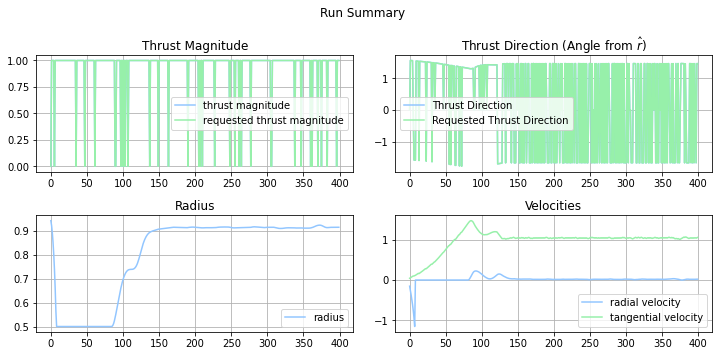

iters: 400, tot_rwd: -8.978e+01
Episode: 901
iters: 400, tot_rwd: -3.041e+01
Episode: 902
iters: 400, tot_rwd: -5.641e+01
Episode: 903
iters: 400, tot_rwd: -2.979e+01
Episode: 904


100%|██████████| 800/800 [00:27<00:00, 29.48it/s, loss=tf.Tensor(0.02558076, shape=(), dtype=float32)]


iters: 400, tot_rwd: -4.155e+01, lss: 2.558e-02
Episode: 905
iters: 400, tot_rwd: -8.827e+01
Episode: 906
iters: 400, tot_rwd: -5.979e+01
Episode: 907
iters: 400, tot_rwd: -4.608e+01
Episode: 908
iters: 400, tot_rwd: -4.013e+01
Episode: 909
iters: 400, tot_rwd: -2.610e+01
Episode: 910
iters: 400, tot_rwd: -2.068e+01
Episode: 911
iters: 400, tot_rwd: -2.827e+01
Episode: 912


100%|██████████| 800/800 [00:30<00:00, 26.22it/s, loss=tf.Tensor(0.015181885, shape=(), dtype=float32)]


iters: 400, tot_rwd: -7.847e+01, lss: 1.518e-02
Episode: 913
iters: 400, tot_rwd: -3.985e+01
Episode: 914
iters: 400, tot_rwd: -3.203e+01
Episode: 915
iters: 400, tot_rwd: -3.253e+01
Episode: 916
iters: 400, tot_rwd: -2.462e+01
Episode: 917
iters: 400, tot_rwd: -4.237e+01
Episode: 918
iters: 400, tot_rwd: -3.100e+01
Episode: 919
iters: 400, tot_rwd: -1.843e+00
Episode: 920


100%|██████████| 800/800 [00:28<00:00, 28.12it/s, loss=tf.Tensor(0.013800358, shape=(), dtype=float32)]


iters: 400, tot_rwd: -7.792e+01, lss: 1.380e-02
Episode: 921
iters: 400, tot_rwd: -8.955e+01
Episode: 922
iters: 400, tot_rwd: -4.355e+01
Episode: 923
iters: 400, tot_rwd: -6.971e+01
Episode: 924
iters: 400, tot_rwd: -2.671e+01
Episode: 925
iters: 400, tot_rwd: -4.072e+01
Episode: 926
iters: 400, tot_rwd: -3.248e+01
Episode: 927
iters: 400, tot_rwd: -3.157e+01
Episode: 928


100%|██████████| 800/800 [00:30<00:00, 25.99it/s, loss=tf.Tensor(0.013287855, shape=(), dtype=float32)]


iters: 400, tot_rwd: -5.171e+01, lss: 1.329e-02
Episode: 929
iters: 400, tot_rwd: -4.937e+01
Episode: 930
iters: 400, tot_rwd: -1.148e+02
Episode: 931
iters: 400, tot_rwd: -2.431e+01
Episode: 932
iters: 400, tot_rwd: -4.033e+01
Episode: 933
iters: 400, tot_rwd: -4.555e+01
Episode: 934
iters: 400, tot_rwd: -6.025e+01
Episode: 935
iters: 400, tot_rwd: -4.224e+01
Episode: 936


100%|██████████| 800/800 [00:28<00:00, 28.27it/s, loss=tf.Tensor(0.020472595, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.018e+02, lss: 2.047e-02
Episode: 937
iters: 400, tot_rwd: -4.249e+01
Episode: 938
iters: 400, tot_rwd: -5.696e+01
Episode: 939
iters: 400, tot_rwd: -4.971e+01
Episode: 940
iters: 400, tot_rwd: -6.055e+01
Episode: 941
iters: 400, tot_rwd: -3.748e+01
Episode: 942
iters: 400, tot_rwd: -1.029e+02
Episode: 943
iters: 400, tot_rwd: -2.859e+01
Episode: 944


100%|██████████| 800/800 [00:31<00:00, 25.70it/s, loss=tf.Tensor(0.009345756, shape=(), dtype=float32)]


iters: 400, tot_rwd: -4.363e+01, lss: 9.346e-03
Episode: 945
iters: 400, tot_rwd: -5.210e+01
Episode: 946
iters: 400, tot_rwd: -4.779e+01
Episode: 947
iters: 400, tot_rwd: -4.022e+01
Episode: 948
iters: 400, tot_rwd: -5.125e+01
Episode: 949
iters: 400, tot_rwd: -5.267e+01
Episode: 950
iters: 400, tot_rwd: -3.776e+01
Episode: 951
iters: 400, tot_rwd: -3.502e+01
Episode: 952


100%|██████████| 800/800 [00:27<00:00, 29.35it/s, loss=tf.Tensor(0.02072512, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.021e+01, lss: 2.073e-02
Episode: 953
iters: 400, tot_rwd: -3.454e+01
Episode: 954
iters: 400, tot_rwd: -1.230e+02
Episode: 955
iters: 400, tot_rwd: -7.891e+01
Episode: 956
iters: 400, tot_rwd: -2.970e+01
Episode: 957
iters: 400, tot_rwd: -6.343e+01
Episode: 958
iters: 400, tot_rwd: -3.655e+01
Episode: 959
iters: 400, tot_rwd: -1.643e+02
Episode: 960


100%|██████████| 800/800 [00:30<00:00, 26.41it/s, loss=tf.Tensor(0.0073977634, shape=(), dtype=float32)]


iters: 400, tot_rwd: -7.774e+01, lss: 7.398e-03
Episode: 961
iters: 400, tot_rwd: -2.617e+01
Episode: 962
iters: 400, tot_rwd: -3.963e+01
Episode: 963
iters: 400, tot_rwd: -7.103e+01
Episode: 964
iters: 400, tot_rwd: -3.627e+01
Episode: 965
iters: 400, tot_rwd: -2.450e+01
Episode: 966
iters: 400, tot_rwd: -1.961e+01
Episode: 967
iters: 400, tot_rwd: -5.157e+01
Episode: 968


100%|██████████| 800/800 [00:28<00:00, 28.33it/s, loss=tf.Tensor(0.012835141, shape=(), dtype=float32)]


iters: 400, tot_rwd: -4.905e+01, lss: 1.284e-02
Episode: 969
iters: 400, tot_rwd: -6.733e+01
Episode: 970
iters: 400, tot_rwd: -2.313e+01
Episode: 971
iters: 400, tot_rwd: -2.856e+01
Episode: 972
iters: 400, tot_rwd: -8.793e+01
Episode: 973
iters: 400, tot_rwd: -3.217e+01
Episode: 974
iters: 400, tot_rwd: -6.844e+01
Episode: 975
iters: 400, tot_rwd: -3.446e+01
Episode: 976


100%|██████████| 800/800 [00:29<00:00, 27.01it/s, loss=tf.Tensor(0.08294534, shape=(), dtype=float32)]


iters: 400, tot_rwd: -9.503e+01, lss: 8.295e-02
Episode: 977
iters: 400, tot_rwd: -3.071e+01
Episode: 978
iters: 400, tot_rwd: -1.237e+01
Episode: 979
iters: 400, tot_rwd: -5.093e+01
Episode: 980
iters: 400, tot_rwd: -7.537e+01
Episode: 981
iters: 400, tot_rwd: -3.051e+02
Episode: 982
iters: 400, tot_rwd: -2.477e+01
Episode: 983
iters: 400, tot_rwd: -4.570e+01
Episode: 984


100%|██████████| 800/800 [00:27<00:00, 29.56it/s, loss=tf.Tensor(0.004681686, shape=(), dtype=float32)]


iters: 400, tot_rwd: -5.874e+01, lss: 4.682e-03
Episode: 985
iters: 400, tot_rwd: -6.265e+01
Episode: 986
iters: 400, tot_rwd: -7.863e+01
Episode: 987
iters: 400, tot_rwd: -2.422e+01
Episode: 988
iters: 400, tot_rwd: -2.551e+01
Episode: 989
iters: 400, tot_rwd: -1.820e+01
Episode: 990
iters: 400, tot_rwd: -5.676e+00
Episode: 991
iters: 400, tot_rwd: -3.389e+01
Episode: 992


100%|██████████| 800/800 [00:29<00:00, 26.84it/s, loss=tf.Tensor(0.0077532176, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.738e+01, lss: 7.753e-03
Episode: 993
iters: 400, tot_rwd: -3.441e+01
Episode: 994
iters: 400, tot_rwd: -4.559e+01
Episode: 995
iters: 400, tot_rwd: -1.804e+01
Episode: 996
iters: 400, tot_rwd: -4.999e+01
Episode: 997
iters: 400, tot_rwd: -3.406e+01
Episode: 998
iters: 400, tot_rwd: -5.500e+01
Episode: 999
iters: 400, tot_rwd: -4.230e+01
Episode: 1000


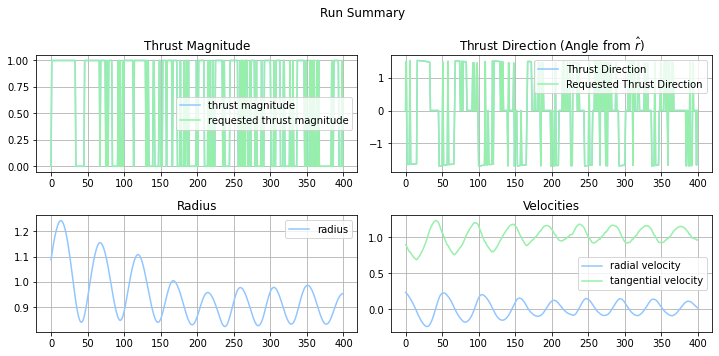

100%|██████████| 800/800 [00:27<00:00, 29.42it/s, loss=tf.Tensor(0.006684929, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.950e+01, lss: 6.685e-03
Episode: 1001
iters: 400, tot_rwd: -1.389e+02
Episode: 1002
iters: 400, tot_rwd: -1.401e+02
Episode: 1003
iters: 400, tot_rwd: -6.424e+01
Episode: 1004
iters: 400, tot_rwd: -3.061e+02
Episode: 1005
iters: 400, tot_rwd: -6.263e+01
Episode: 1006
iters: 400, tot_rwd: -1.071e+02
Episode: 1007
iters: 400, tot_rwd: -3.033e+01
Episode: 1008


100%|██████████| 800/800 [00:27<00:00, 28.69it/s, loss=tf.Tensor(0.0043398724, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.224e+02, lss: 4.340e-03
Episode: 1009
iters: 400, tot_rwd: -8.305e+01
Episode: 1010
iters: 400, tot_rwd: -7.407e+00
Episode: 1011
iters: 400, tot_rwd: -3.745e+01
Episode: 1012
iters: 400, tot_rwd: -7.466e+01
Episode: 1013
iters: 400, tot_rwd: -8.964e+01
Episode: 1014
iters: 400, tot_rwd: -2.604e+01
Episode: 1015
iters: 400, tot_rwd: -5.134e+01
Episode: 1016


100%|██████████| 800/800 [00:27<00:00, 28.68it/s, loss=tf.Tensor(0.012785591, shape=(), dtype=float32)]


iters: 400, tot_rwd: -4.620e+01, lss: 1.279e-02
Episode: 1017
iters: 400, tot_rwd: -3.856e+01
Episode: 1018
iters: 400, tot_rwd: -5.841e+01
Episode: 1019
iters: 400, tot_rwd: -9.024e+01
Episode: 1020
iters: 400, tot_rwd: -4.433e+01
Episode: 1021
iters: 400, tot_rwd: -1.114e+01
Episode: 1022
iters: 400, tot_rwd: -3.181e+01
Episode: 1023
iters: 400, tot_rwd: -2.057e+01
Episode: 1024


100%|██████████| 800/800 [00:27<00:00, 29.49it/s, loss=tf.Tensor(0.0052246046, shape=(), dtype=float32)]


iters: 400, tot_rwd: -5.954e+01, lss: 5.225e-03
Episode: 1025
iters: 400, tot_rwd: -5.766e+01
Episode: 1026
iters: 400, tot_rwd: -2.965e+01
Episode: 1027
iters: 400, tot_rwd: -3.423e+01
Episode: 1028
iters: 400, tot_rwd: -1.409e+01
Episode: 1029
iters: 400, tot_rwd: -8.294e+01
Episode: 1030
iters: 400, tot_rwd: -4.577e+01
Episode: 1031
iters: 400, tot_rwd: -3.207e+01
Episode: 1032


100%|██████████| 800/800 [00:28<00:00, 27.85it/s, loss=tf.Tensor(0.0064602066, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.493e+01, lss: 6.460e-03
Episode: 1033
iters: 400, tot_rwd: -3.027e+01
Episode: 1034
iters: 400, tot_rwd: -2.449e+01
Episode: 1035
iters: 400, tot_rwd: -1.708e+01
Episode: 1036
iters: 400, tot_rwd: -3.518e+01
Episode: 1037
iters: 400, tot_rwd: -2.111e+01
Episode: 1038
iters: 400, tot_rwd: -3.026e+01
Episode: 1039
iters: 400, tot_rwd: -3.086e+01
Episode: 1040


100%|██████████| 800/800 [00:27<00:00, 29.15it/s, loss=tf.Tensor(0.007759307, shape=(), dtype=float32)]


iters: 400, tot_rwd: -5.398e+01, lss: 7.759e-03
Episode: 1041
iters: 400, tot_rwd: -5.360e+01
Episode: 1042
iters: 400, tot_rwd: -3.592e+01
Episode: 1043
iters: 400, tot_rwd: -2.594e+01
Episode: 1044
iters: 400, tot_rwd: -3.644e+01
Episode: 1045
iters: 400, tot_rwd: -4.902e+01
Episode: 1046
iters: 400, tot_rwd: -1.349e+01
Episode: 1047
iters: 400, tot_rwd: -3.434e+01
Episode: 1048


100%|██████████| 800/800 [00:29<00:00, 27.08it/s, loss=tf.Tensor(0.010590393, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.422e+01, lss: 1.059e-02
Episode: 1049
iters: 400, tot_rwd: -5.818e+01
Episode: 1050
iters: 400, tot_rwd: -2.431e+01
Episode: 1051
iters: 400, tot_rwd: -6.286e+01
Episode: 1052
iters: 400, tot_rwd: -2.316e+01
Episode: 1053
iters: 400, tot_rwd: -2.782e+01
Episode: 1054
iters: 400, tot_rwd: -4.825e+01
Episode: 1055
iters: 400, tot_rwd: -2.803e+01
Episode: 1056


100%|██████████| 800/800 [00:27<00:00, 29.32it/s, loss=tf.Tensor(0.0020594024, shape=(), dtype=float32)]


iters: 400, tot_rwd: -8.510e+01, lss: 2.059e-03
Episode: 1057
iters: 400, tot_rwd: -7.323e+00
Episode: 1058
iters: 400, tot_rwd: -5.952e+01
Episode: 1059
iters: 400, tot_rwd: -2.303e+01
Episode: 1060
iters: 400, tot_rwd: -2.656e+00
Episode: 1061
iters: 400, tot_rwd: -7.614e+00
Episode: 1062
iters: 400, tot_rwd: -7.775e+01
Episode: 1063
iters: 400, tot_rwd: -7.187e+00
Episode: 1064


100%|██████████| 800/800 [00:30<00:00, 26.04it/s, loss=tf.Tensor(0.003929108, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.285e+01, lss: 3.929e-03
Episode: 1065
iters: 400, tot_rwd: -8.010e+01
Episode: 1066
iters: 400, tot_rwd: -5.233e+01
Episode: 1067
iters: 400, tot_rwd: -3.014e+01
Episode: 1068
iters: 400, tot_rwd: -2.900e+01
Episode: 1069
iters: 400, tot_rwd: -6.599e+01
Episode: 1070
iters: 400, tot_rwd: -2.867e+01
Episode: 1071
iters: 400, tot_rwd: -3.476e+01
Episode: 1072


100%|██████████| 800/800 [00:27<00:00, 29.33it/s, loss=tf.Tensor(0.0029276614, shape=(), dtype=float32)]


iters: 400, tot_rwd: -8.542e+00, lss: 2.928e-03
Episode: 1073
iters: 400, tot_rwd: -2.980e+01
Episode: 1074
iters: 400, tot_rwd: -8.097e+01
Episode: 1075
iters: 400, tot_rwd: -1.811e+01
Episode: 1076
iters: 400, tot_rwd: -1.436e+01
Episode: 1077
iters: 400, tot_rwd: -6.384e+01
Episode: 1078
iters: 400, tot_rwd: -1.901e+01
Episode: 1079
iters: 400, tot_rwd: -2.093e+01
Episode: 1080


100%|██████████| 800/800 [00:31<00:00, 25.76it/s, loss=tf.Tensor(0.0035347482, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.947e+01, lss: 3.535e-03
Episode: 1081
iters: 400, tot_rwd: -1.515e+01
Episode: 1082
iters: 400, tot_rwd: -1.045e+01
Episode: 1083
iters: 400, tot_rwd: -3.417e+01
Episode: 1084
iters: 400, tot_rwd: -5.480e+01
Episode: 1085
iters: 400, tot_rwd: -3.558e+01
Episode: 1086
iters: 400, tot_rwd: -1.235e+01
Episode: 1087
iters: 400, tot_rwd: -5.587e+01
Episode: 1088


100%|██████████| 800/800 [00:27<00:00, 28.66it/s, loss=tf.Tensor(0.0148171345, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.504e+01, lss: 1.482e-02
Episode: 1089
iters: 400, tot_rwd: -1.003e+02
Episode: 1090
iters: 400, tot_rwd: -3.607e+01
Episode: 1091
iters: 400, tot_rwd: -4.016e+01
Episode: 1092
iters: 400, tot_rwd: -2.739e+01
Episode: 1093
iters: 400, tot_rwd: -5.879e+01
Episode: 1094
iters: 400, tot_rwd: -1.162e+02
Episode: 1095
iters: 400, tot_rwd: -1.562e+01
Episode: 1096


100%|██████████| 800/800 [00:33<00:00, 24.06it/s, loss=tf.Tensor(0.0036745088, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.386e+01, lss: 3.675e-03
Episode: 1097
iters: 400, tot_rwd: -2.662e+01
Episode: 1098
iters: 400, tot_rwd: -3.239e+01
Episode: 1099
iters: 400, tot_rwd: -3.435e+01
Episode: 1100


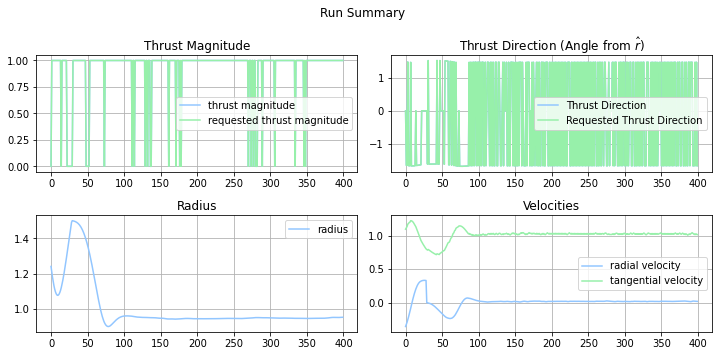

iters: 400, tot_rwd: -2.708e+01
Episode: 1101
iters: 400, tot_rwd: -3.270e+01
Episode: 1102
iters: 400, tot_rwd: -6.540e+01
Episode: 1103
iters: 400, tot_rwd: -2.847e+01
Episode: 1104


100%|██████████| 800/800 [00:28<00:00, 28.20it/s, loss=tf.Tensor(0.008628644, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.718e+01, lss: 8.629e-03
Episode: 1105
iters: 400, tot_rwd: -7.203e+01
Episode: 1106
iters: 400, tot_rwd: -1.803e+01
Episode: 1107
iters: 400, tot_rwd: -5.304e+01
Episode: 1108
iters: 400, tot_rwd: -8.659e+01
Episode: 1109
iters: 400, tot_rwd: -2.623e+01
Episode: 1110
iters: 400, tot_rwd: -4.214e+01
Episode: 1111
iters: 400, tot_rwd: -3.548e+01
Episode: 1112


100%|██████████| 800/800 [00:31<00:00, 25.35it/s, loss=tf.Tensor(0.0028497751, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.823e+01, lss: 2.850e-03
Episode: 1113
iters: 400, tot_rwd: -6.103e+02
Episode: 1114
iters: 400, tot_rwd: -3.432e+01
Episode: 1115
iters: 400, tot_rwd: -1.608e+01
Episode: 1116
iters: 400, tot_rwd: -2.299e+01
Episode: 1117
iters: 400, tot_rwd: -5.971e+00
Episode: 1118
iters: 400, tot_rwd: -4.251e+01
Episode: 1119
iters: 400, tot_rwd: -3.846e+01
Episode: 1120


100%|██████████| 800/800 [00:28<00:00, 27.98it/s, loss=tf.Tensor(0.0089682825, shape=(), dtype=float32)]


iters: 400, tot_rwd: -4.122e+01, lss: 8.968e-03
Episode: 1121
iters: 400, tot_rwd: -3.024e+01
Episode: 1122
iters: 400, tot_rwd: -1.944e+01
Episode: 1123
iters: 400, tot_rwd: -3.892e+01
Episode: 1124
iters: 400, tot_rwd: -2.381e+01
Episode: 1125
iters: 400, tot_rwd: -3.878e+01
Episode: 1126
iters: 400, tot_rwd: -4.421e+01
Episode: 1127
iters: 400, tot_rwd: -6.068e+01
Episode: 1128


100%|██████████| 800/800 [00:31<00:00, 25.09it/s, loss=tf.Tensor(0.011253064, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.285e+01, lss: 1.125e-02
Episode: 1129
iters: 400, tot_rwd: -3.469e+01
Episode: 1130
iters: 400, tot_rwd: -2.108e+01
Episode: 1131
iters: 400, tot_rwd: -8.832e+01
Episode: 1132
iters: 400, tot_rwd: -4.208e+00
Episode: 1133
iters: 400, tot_rwd: -5.314e+01
Episode: 1134
iters: 400, tot_rwd: -3.874e+01
Episode: 1135
iters: 400, tot_rwd: -1.908e+01
Episode: 1136


100%|██████████| 800/800 [00:27<00:00, 29.25it/s, loss=tf.Tensor(0.0032087658, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.672e+01, lss: 3.209e-03
Episode: 1137
iters: 400, tot_rwd: -5.479e+01
Episode: 1138
iters: 400, tot_rwd: -1.779e+01
Episode: 1139
iters: 400, tot_rwd: -2.991e+01
Episode: 1140
iters: 400, tot_rwd: -3.839e+01
Episode: 1141
iters: 400, tot_rwd: -3.987e+01
Episode: 1142
iters: 400, tot_rwd: -3.451e+01
Episode: 1143
iters: 400, tot_rwd: -2.143e+01
Episode: 1144


100%|██████████| 800/800 [00:32<00:00, 24.90it/s, loss=tf.Tensor(0.0138476305, shape=(), dtype=float32)]


iters: 400, tot_rwd: -7.833e+01, lss: 1.385e-02
Episode: 1145
iters: 400, tot_rwd: -2.845e+01
Episode: 1146
iters: 400, tot_rwd: -7.706e+01
Episode: 1147
iters: 400, tot_rwd: -1.731e+01
Episode: 1148
iters: 400, tot_rwd: -3.417e+00
Episode: 1149
iters: 400, tot_rwd: -6.464e+01
Episode: 1150
iters: 400, tot_rwd: -3.099e+01
Episode: 1151
iters: 400, tot_rwd: -2.325e+00
Episode: 1152


100%|██████████| 800/800 [00:27<00:00, 28.93it/s, loss=tf.Tensor(0.0022441412, shape=(), dtype=float32)]


iters: 400, tot_rwd: -7.083e+01, lss: 2.244e-03
Episode: 1153
iters: 400, tot_rwd: -1.598e+01
Episode: 1154
iters: 400, tot_rwd: -2.820e+01
Episode: 1155
iters: 400, tot_rwd: -5.813e+00
Episode: 1156
iters: 400, tot_rwd: -5.533e+01
Episode: 1157
iters: 400, tot_rwd: -7.478e+01
Episode: 1158
iters: 400, tot_rwd: -3.494e+01
Episode: 1159
iters: 400, tot_rwd: -7.539e+01
Episode: 1160


100%|██████████| 800/800 [00:31<00:00, 25.23it/s, loss=tf.Tensor(0.009237492, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.076e+01, lss: 9.237e-03
Episode: 1161
iters: 400, tot_rwd: -1.603e+01
Episode: 1162
iters: 400, tot_rwd: -2.328e+01
Episode: 1163
iters: 400, tot_rwd: -2.953e+00
Episode: 1164
iters: 400, tot_rwd: -4.315e+01
Episode: 1165
iters: 400, tot_rwd: -1.289e+01
Episode: 1166
iters: 400, tot_rwd: -1.437e+01
Episode: 1167
iters: 400, tot_rwd: -3.330e+01
Episode: 1168


100%|██████████| 800/800 [00:27<00:00, 28.61it/s, loss=tf.Tensor(0.005552455, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.688e+00, lss: 5.552e-03
Episode: 1169
iters: 400, tot_rwd: -2.535e+01
Episode: 1170
iters: 400, tot_rwd: -6.856e+01
Episode: 1171
iters: 400, tot_rwd: -4.899e+01
Episode: 1172
iters: 400, tot_rwd: -2.700e+01
Episode: 1173
iters: 400, tot_rwd: -1.904e+01
Episode: 1174
iters: 400, tot_rwd: -3.784e+01
Episode: 1175
iters: 400, tot_rwd: -3.351e+01
Episode: 1176


100%|██████████| 800/800 [00:32<00:00, 24.99it/s, loss=tf.Tensor(0.0017240541, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.668e+01, lss: 1.724e-03
Episode: 1177
iters: 400, tot_rwd: -8.541e+01
Episode: 1178
iters: 400, tot_rwd: -2.207e+01
Episode: 1179
iters: 400, tot_rwd: -2.274e+01
Episode: 1180
iters: 400, tot_rwd: -2.381e+01
Episode: 1181
iters: 400, tot_rwd: -2.520e+01
Episode: 1182
iters: 400, tot_rwd: -1.701e+01
Episode: 1183
iters: 400, tot_rwd: -2.795e+01
Episode: 1184


100%|██████████| 800/800 [00:26<00:00, 29.88it/s, loss=tf.Tensor(0.0061313203, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.260e+01, lss: 6.131e-03
Episode: 1185
iters: 400, tot_rwd: -2.313e+01
Episode: 1186
iters: 400, tot_rwd: -1.099e+01
Episode: 1187
iters: 400, tot_rwd: -2.018e+01
Episode: 1188
iters: 400, tot_rwd: -4.320e+01
Episode: 1189
iters: 400, tot_rwd: -6.894e+01
Episode: 1190
iters: 400, tot_rwd: -3.258e+01
Episode: 1191
iters: 400, tot_rwd: -1.989e+01
Episode: 1192


100%|██████████| 800/800 [00:31<00:00, 25.27it/s, loss=tf.Tensor(0.0013652473, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.012e+01, lss: 1.365e-03
Episode: 1193
iters: 400, tot_rwd: -8.364e+00
Episode: 1194
iters: 400, tot_rwd: -3.145e+01
Episode: 1195
iters: 400, tot_rwd: -2.232e+01
Episode: 1196
iters: 400, tot_rwd: -5.555e+01
Episode: 1197
iters: 400, tot_rwd: -3.094e+01
Episode: 1198
iters: 400, tot_rwd: -1.270e+01
Episode: 1199
iters: 400, tot_rwd: -2.134e+01
Episode: 1200


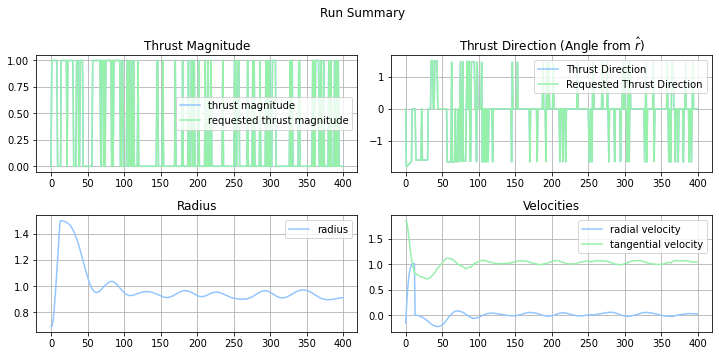

100%|██████████| 800/800 [00:28<00:00, 28.28it/s, loss=tf.Tensor(0.025006315, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.883e+01, lss: 2.501e-02
Episode: 1201
iters: 400, tot_rwd: -2.962e+01
Episode: 1202
iters: 400, tot_rwd: -7.573e+00
Episode: 1203
iters: 400, tot_rwd: -8.242e+00
Episode: 1204
iters: 400, tot_rwd: -3.992e+01
Episode: 1205
iters: 400, tot_rwd: -9.765e+00
Episode: 1206
iters: 400, tot_rwd: -4.789e+00
Episode: 1207
iters: 400, tot_rwd: -3.844e+01
Episode: 1208


100%|██████████| 800/800 [00:32<00:00, 24.95it/s, loss=tf.Tensor(0.011439254, shape=(), dtype=float32)]


iters: 400, tot_rwd: -4.119e+01, lss: 1.144e-02
Episode: 1209
iters: 400, tot_rwd: -2.885e+01
Episode: 1210
iters: 400, tot_rwd: -7.894e+01
Episode: 1211
iters: 400, tot_rwd: -3.570e+01
Episode: 1212
iters: 400, tot_rwd: -3.498e+01
Episode: 1213
iters: 400, tot_rwd: -4.923e+01
Episode: 1214
iters: 400, tot_rwd: -2.808e+01
Episode: 1215
iters: 400, tot_rwd: -2.459e+01
Episode: 1216


100%|██████████| 800/800 [00:27<00:00, 29.18it/s, loss=tf.Tensor(0.042438872, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.404e+01, lss: 4.244e-02
Episode: 1217
iters: 400, tot_rwd: -1.612e+01
Episode: 1218
iters: 400, tot_rwd: -4.022e+01
Episode: 1219
iters: 400, tot_rwd: -9.633e+00
Episode: 1220
iters: 400, tot_rwd: -3.891e+01
Episode: 1221
iters: 400, tot_rwd: -5.344e+01
Episode: 1222
iters: 400, tot_rwd: -2.333e+01
Episode: 1223
iters: 400, tot_rwd: -1.750e+01
Episode: 1224


100%|██████████| 800/800 [00:31<00:00, 25.10it/s, loss=tf.Tensor(0.0011209344, shape=(), dtype=float32)]


iters: 400, tot_rwd: -4.153e+01, lss: 1.121e-03
Episode: 1225
iters: 400, tot_rwd: -1.361e+02
Episode: 1226
iters: 400, tot_rwd: -3.700e+01
Episode: 1227
iters: 400, tot_rwd: -1.305e+01
Episode: 1228
iters: 400, tot_rwd: -8.037e+00
Episode: 1229
iters: 400, tot_rwd: -8.524e+00
Episode: 1230
iters: 400, tot_rwd: -4.008e+01
Episode: 1231
iters: 400, tot_rwd: -4.095e+01
Episode: 1232


100%|██████████| 800/800 [00:27<00:00, 28.96it/s, loss=tf.Tensor(0.005941415, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.080e+01, lss: 5.941e-03
Episode: 1233
iters: 400, tot_rwd: -4.053e+01
Episode: 1234
iters: 400, tot_rwd: -6.560e+00
Episode: 1235
iters: 400, tot_rwd: -5.585e+01
Episode: 1236
iters: 400, tot_rwd: -6.586e+01
Episode: 1237
iters: 400, tot_rwd: -3.781e+01
Episode: 1238
iters: 400, tot_rwd: -2.146e+01
Episode: 1239
iters: 400, tot_rwd: -6.472e+01
Episode: 1240


100%|██████████| 800/800 [00:31<00:00, 25.05it/s, loss=tf.Tensor(0.0030640808, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.976e+01, lss: 3.064e-03
Episode: 1241
iters: 400, tot_rwd: -1.977e+01
Episode: 1242
iters: 400, tot_rwd: -2.325e+01
Episode: 1243
iters: 400, tot_rwd: -3.510e+01
Episode: 1244
iters: 400, tot_rwd: -3.648e+01
Episode: 1245
iters: 400, tot_rwd: -2.404e+01
Episode: 1246
iters: 400, tot_rwd: -4.230e+01
Episode: 1247
iters: 400, tot_rwd: -7.729e+01
Episode: 1248


100%|██████████| 800/800 [00:27<00:00, 29.13it/s, loss=tf.Tensor(0.005849754, shape=(), dtype=float32)]


iters: 400, tot_rwd: -5.705e+01, lss: 5.850e-03
Episode: 1249
iters: 400, tot_rwd: -1.084e+01
Episode: 1250
iters: 400, tot_rwd: -5.951e+01
Episode: 1251
iters: 400, tot_rwd: -2.000e+01
Episode: 1252
iters: 400, tot_rwd: -3.532e+01
Episode: 1253
iters: 400, tot_rwd: -5.863e+01
Episode: 1254
iters: 400, tot_rwd: -1.308e+01
Episode: 1255
iters: 400, tot_rwd: -3.836e+01
Episode: 1256


100%|██████████| 800/800 [00:31<00:00, 25.28it/s, loss=tf.Tensor(0.0017697815, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.278e+01, lss: 1.770e-03
Episode: 1257
iters: 400, tot_rwd: -2.187e+01
Episode: 1258
iters: 400, tot_rwd: -3.798e+01
Episode: 1259
iters: 400, tot_rwd: -1.020e+02
Episode: 1260
iters: 400, tot_rwd: -5.720e+01
Episode: 1261
iters: 400, tot_rwd: -2.329e+01
Episode: 1262
iters: 400, tot_rwd: -2.314e+01
Episode: 1263
iters: 400, tot_rwd: -1.126e+02
Episode: 1264


100%|██████████| 800/800 [00:27<00:00, 29.06it/s, loss=tf.Tensor(0.00962813, shape=(), dtype=float32)]


iters: 400, tot_rwd: -7.587e+01, lss: 9.628e-03
Episode: 1265
iters: 400, tot_rwd: -2.501e+01
Episode: 1266
iters: 400, tot_rwd: -7.326e+01
Episode: 1267
iters: 400, tot_rwd: -1.921e+01
Episode: 1268
iters: 400, tot_rwd: -2.130e+01
Episode: 1269
iters: 400, tot_rwd: -5.946e+01
Episode: 1270
iters: 400, tot_rwd: -1.018e+01
Episode: 1271
iters: 400, tot_rwd: -8.278e+01
Episode: 1272


100%|██████████| 800/800 [00:31<00:00, 25.04it/s, loss=tf.Tensor(0.010257741, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.820e+01, lss: 1.026e-02
Episode: 1273
iters: 400, tot_rwd: -2.585e+02
Episode: 1274
iters: 400, tot_rwd: -2.743e+01
Episode: 1275
iters: 400, tot_rwd: -7.461e+01
Episode: 1276
iters: 400, tot_rwd: -2.961e+01
Episode: 1277
iters: 400, tot_rwd: -5.393e+00
Episode: 1278
iters: 400, tot_rwd: -2.977e+02
Episode: 1279
iters: 400, tot_rwd: -5.638e+01
Episode: 1280


100%|██████████| 800/800 [00:27<00:00, 29.18it/s, loss=tf.Tensor(0.0032868667, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.683e+01, lss: 3.287e-03
Episode: 1281
iters: 400, tot_rwd: -8.339e+01
Episode: 1282
iters: 400, tot_rwd: -5.123e+00
Episode: 1283
iters: 400, tot_rwd: -5.043e+01
Episode: 1284
iters: 400, tot_rwd: -2.254e+01
Episode: 1285
iters: 400, tot_rwd: -2.781e+01
Episode: 1286
iters: 400, tot_rwd: -2.168e+01
Episode: 1287
iters: 400, tot_rwd: -2.274e+01
Episode: 1288


100%|██████████| 800/800 [00:31<00:00, 25.56it/s, loss=tf.Tensor(0.015677966, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.445e+01, lss: 1.568e-02
Episode: 1289
iters: 400, tot_rwd: -5.582e+00
Episode: 1290
iters: 400, tot_rwd: -5.646e+01
Episode: 1291
iters: 400, tot_rwd: -7.277e+01
Episode: 1292
iters: 400, tot_rwd: -8.583e+01
Episode: 1293
iters: 400, tot_rwd: -3.539e+01
Episode: 1294
iters: 400, tot_rwd: -3.286e+01
Episode: 1295
iters: 400, tot_rwd: -6.698e+00
Episode: 1296


100%|██████████| 800/800 [00:27<00:00, 29.53it/s, loss=tf.Tensor(0.0076615647, shape=(), dtype=float32)]


iters: 400, tot_rwd: -6.924e+01, lss: 7.662e-03
Episode: 1297
iters: 400, tot_rwd: -3.089e+01
Episode: 1298
iters: 400, tot_rwd: -8.837e+00
Episode: 1299
iters: 400, tot_rwd: -5.360e+01
Episode: 1300


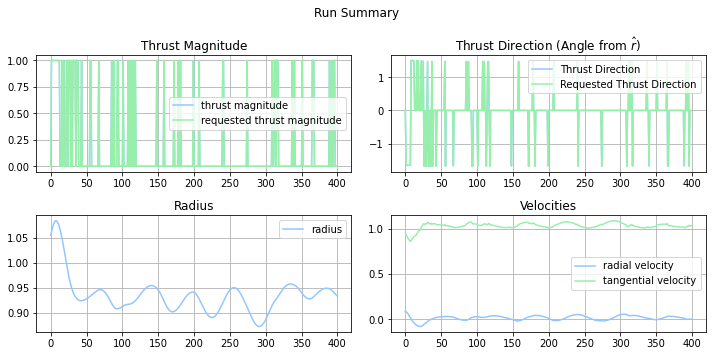

iters: 400, tot_rwd: -7.356e+00
Episode: 1301
iters: 400, tot_rwd: -3.674e+01
Episode: 1302
iters: 400, tot_rwd: -3.254e+01
Episode: 1303
iters: 400, tot_rwd: -8.074e+01
Episode: 1304


100%|██████████| 800/800 [00:29<00:00, 26.97it/s, loss=tf.Tensor(0.0035009687, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.124e+01, lss: 3.501e-03
Episode: 1305
iters: 400, tot_rwd: -2.828e+01
Episode: 1306
iters: 400, tot_rwd: -5.346e+01
Episode: 1307
iters: 400, tot_rwd: -2.567e+01
Episode: 1308
iters: 400, tot_rwd: -2.741e+01
Episode: 1309
iters: 400, tot_rwd: -2.445e+01
Episode: 1310
iters: 400, tot_rwd: -8.373e+01
Episode: 1311
iters: 400, tot_rwd: -3.289e+01
Episode: 1312


100%|██████████| 800/800 [00:27<00:00, 29.50it/s, loss=tf.Tensor(0.16415904, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.562e+01, lss: 1.642e-01
Episode: 1313
iters: 400, tot_rwd: -4.319e+01
Episode: 1314
iters: 400, tot_rwd: -6.034e+01
Episode: 1315
iters: 400, tot_rwd: -6.461e+01
Episode: 1316
iters: 400, tot_rwd: -6.175e+01
Episode: 1317
iters: 400, tot_rwd: -5.779e+01
Episode: 1318
iters: 400, tot_rwd: -5.644e+01
Episode: 1319
iters: 400, tot_rwd: -7.324e+01
Episode: 1320


100%|██████████| 800/800 [00:27<00:00, 28.92it/s, loss=tf.Tensor(0.0056996336, shape=(), dtype=float32)]


iters: 400, tot_rwd: -5.863e+01, lss: 5.700e-03
Episode: 1321
iters: 400, tot_rwd: -4.108e+01
Episode: 1322
iters: 400, tot_rwd: -1.762e+01
Episode: 1323
iters: 400, tot_rwd: -1.429e+01
Episode: 1324
iters: 400, tot_rwd: -2.955e+01
Episode: 1325
iters: 400, tot_rwd: -8.836e+00
Episode: 1326
iters: 400, tot_rwd: -8.105e+01
Episode: 1327
iters: 400, tot_rwd: -3.610e+01
Episode: 1328


100%|██████████| 800/800 [00:29<00:00, 27.56it/s, loss=tf.Tensor(0.0014539027, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.587e+01, lss: 1.454e-03
Episode: 1329
iters: 400, tot_rwd: -3.047e+01
Episode: 1330
iters: 400, tot_rwd: -2.998e+01
Episode: 1331
iters: 400, tot_rwd: -5.743e+01
Episode: 1332
iters: 400, tot_rwd: -5.794e+01
Episode: 1333
iters: 400, tot_rwd: -4.305e+01
Episode: 1334
iters: 400, tot_rwd: -4.249e+01
Episode: 1335
iters: 400, tot_rwd: -2.350e+01
Episode: 1336


100%|██████████| 800/800 [00:26<00:00, 29.86it/s, loss=tf.Tensor(0.002564453, shape=(), dtype=float32)]


iters: 400, tot_rwd: -8.502e+01, lss: 2.564e-03
Episode: 1337
iters: 400, tot_rwd: -2.908e+01
Episode: 1338
iters: 400, tot_rwd: -2.373e+01
Episode: 1339
iters: 400, tot_rwd: -1.815e+01
Episode: 1340
iters: 400, tot_rwd: -3.657e+01
Episode: 1341
iters: 400, tot_rwd: -5.695e+00
Episode: 1342
iters: 400, tot_rwd: -5.541e+01
Episode: 1343
iters: 400, tot_rwd: -1.476e+01
Episode: 1344


100%|██████████| 800/800 [00:30<00:00, 26.13it/s, loss=tf.Tensor(0.0028825717, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.035e+01, lss: 2.883e-03
Episode: 1345
iters: 400, tot_rwd: -2.760e+01
Episode: 1346
iters: 400, tot_rwd: -5.482e+01
Episode: 1347
iters: 400, tot_rwd: -1.893e+01
Episode: 1348
iters: 400, tot_rwd: -3.028e+01
Episode: 1349
iters: 400, tot_rwd: -3.030e+01
Episode: 1350
iters: 400, tot_rwd: -4.464e+01
Episode: 1351
iters: 400, tot_rwd: -2.211e+01
Episode: 1352


100%|██████████| 800/800 [00:26<00:00, 30.36it/s, loss=tf.Tensor(0.21756704, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.006e+01, lss: 2.176e-01
Episode: 1353
iters: 400, tot_rwd: -4.711e+00
Episode: 1354
iters: 400, tot_rwd: -1.665e+01
Episode: 1355
iters: 400, tot_rwd: -1.089e+01
Episode: 1356
iters: 400, tot_rwd: -6.248e+01
Episode: 1357
iters: 400, tot_rwd: -2.640e+01
Episode: 1358
iters: 400, tot_rwd: -1.845e+01
Episode: 1359
iters: 400, tot_rwd: -5.951e+01
Episode: 1360


100%|██████████| 800/800 [00:32<00:00, 24.52it/s, loss=tf.Tensor(0.00761638, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.992e+01, lss: 7.616e-03
Episode: 1361
iters: 400, tot_rwd: -6.937e+01
Episode: 1362
iters: 400, tot_rwd: -4.616e+00
Episode: 1363
iters: 400, tot_rwd: -3.317e+01
Episode: 1364
iters: 400, tot_rwd: -7.649e+01
Episode: 1365
iters: 400, tot_rwd: -3.464e+01
Episode: 1366
iters: 400, tot_rwd: -2.040e+01
Episode: 1367
iters: 400, tot_rwd: -5.508e+01
Episode: 1368


100%|██████████| 800/800 [00:27<00:00, 29.45it/s, loss=tf.Tensor(0.0006345062, shape=(), dtype=float32)]


iters: 400, tot_rwd: -1.011e+01, lss: 6.345e-04
Episode: 1369
iters: 400, tot_rwd: -4.181e+01
Episode: 1370
iters: 400, tot_rwd: -6.137e+01
Episode: 1371
iters: 400, tot_rwd: -7.150e+01
Episode: 1372
iters: 400, tot_rwd: -6.998e+00
Episode: 1373
iters: 400, tot_rwd: -2.936e+01
Episode: 1374
iters: 400, tot_rwd: -1.636e+01
Episode: 1375
iters: 400, tot_rwd: -1.756e+01
Episode: 1376


100%|██████████| 800/800 [00:32<00:00, 24.89it/s, loss=tf.Tensor(0.0006033993, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.865e+01, lss: 6.034e-04
Episode: 1377
iters: 400, tot_rwd: -3.357e+01
Episode: 1378
iters: 400, tot_rwd: -3.218e+01
Episode: 1379
iters: 400, tot_rwd: -2.318e+01
Episode: 1380
iters: 400, tot_rwd: -2.141e+01
Episode: 1381
iters: 400, tot_rwd: -4.167e+01
Episode: 1382
iters: 400, tot_rwd: -2.356e+01
Episode: 1383
iters: 400, tot_rwd: -3.669e+01
Episode: 1384


100%|██████████| 800/800 [00:26<00:00, 29.71it/s, loss=tf.Tensor(0.29563048, shape=(), dtype=float32)]


iters: 400, tot_rwd: -5.625e+01, lss: 2.956e-01
Episode: 1385
iters: 400, tot_rwd: -1.264e+01
Episode: 1386
iters: 400, tot_rwd: -5.883e+00
Episode: 1387
iters: 400, tot_rwd: -3.191e+01
Episode: 1388
iters: 400, tot_rwd: -6.463e+01
Episode: 1389
iters: 400, tot_rwd: -2.718e+01
Episode: 1390
iters: 400, tot_rwd: -4.030e+01
Episode: 1391
iters: 400, tot_rwd: -5.499e+01
Episode: 1392


100%|██████████| 800/800 [00:32<00:00, 24.63it/s, loss=tf.Tensor(0.00075666525, shape=(), dtype=float32)]


iters: 400, tot_rwd: -4.926e+00, lss: 7.567e-04
Episode: 1393
iters: 400, tot_rwd: -3.110e+00
Episode: 1394
iters: 400, tot_rwd: -3.200e+01
Episode: 1395
iters: 400, tot_rwd: -1.721e+01
Episode: 1396
iters: 400, tot_rwd: -2.882e+01
Episode: 1397
iters: 400, tot_rwd: -4.708e+01
Episode: 1398
iters: 400, tot_rwd: -2.874e+01
Episode: 1399
iters: 400, tot_rwd: -8.027e+01
Episode: 1400


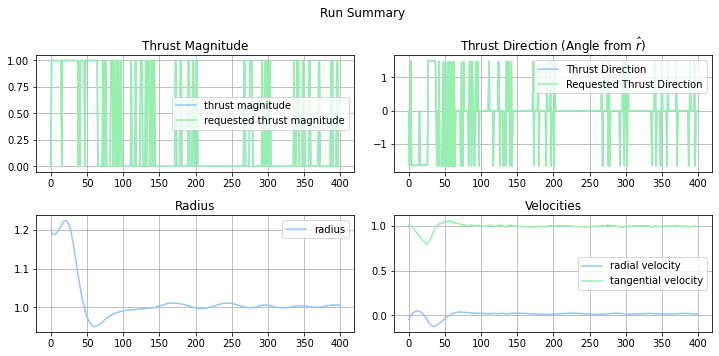

100%|██████████| 800/800 [00:27<00:00, 29.38it/s, loss=tf.Tensor(0.0023067559, shape=(), dtype=float32)]


iters: 400, tot_rwd: -5.074e+00, lss: 2.307e-03
Episode: 1401
iters: 400, tot_rwd: -2.325e+01
Episode: 1402
iters: 400, tot_rwd: -5.451e+00
Episode: 1403
iters: 400, tot_rwd: -9.134e+00
Episode: 1404
iters: 400, tot_rwd: -2.732e+01
Episode: 1405
iters: 400, tot_rwd: -4.061e+01
Episode: 1406
iters: 400, tot_rwd: -2.299e+01
Episode: 1407
iters: 400, tot_rwd: -1.992e+01
Episode: 1408


100%|██████████| 800/800 [00:32<00:00, 24.60it/s, loss=tf.Tensor(0.0021699085, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.662e+00, lss: 2.170e-03
Episode: 1409
iters: 400, tot_rwd: -6.852e+00
Episode: 1410
iters: 400, tot_rwd: -3.103e+01
Episode: 1411
iters: 400, tot_rwd: -2.314e+01
Episode: 1412
iters: 400, tot_rwd: -7.565e+01
Episode: 1413
iters: 400, tot_rwd: -2.909e+01
Episode: 1414
iters: 400, tot_rwd: -2.514e+01
Episode: 1415
iters: 400, tot_rwd: -2.759e+01
Episode: 1416


100%|██████████| 800/800 [00:27<00:00, 29.56it/s, loss=tf.Tensor(0.0038273712, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.690e+01, lss: 3.827e-03
Episode: 1417
iters: 400, tot_rwd: -7.783e+01
Episode: 1418
iters: 400, tot_rwd: -2.944e+01
Episode: 1419
iters: 400, tot_rwd: -4.331e+01
Episode: 1420
iters: 400, tot_rwd: -5.235e+00
Episode: 1421
iters: 400, tot_rwd: -3.738e+01
Episode: 1422
iters: 400, tot_rwd: -8.902e+01
Episode: 1423
iters: 400, tot_rwd: -1.444e+01
Episode: 1424


100%|██████████| 800/800 [00:26<00:00, 30.26it/s, loss=tf.Tensor(0.002933986, shape=(), dtype=float32)]


iters: 400, tot_rwd: -4.098e+01, lss: 2.934e-03
Episode: 1425
iters: 400, tot_rwd: -7.225e+00
Episode: 1426
iters: 400, tot_rwd: -3.448e+01
Episode: 1427
iters: 400, tot_rwd: -1.490e+01
Episode: 1428
iters: 400, tot_rwd: -3.103e+01
Episode: 1429
iters: 400, tot_rwd: -2.373e+01
Episode: 1430
iters: 400, tot_rwd: -2.962e+01
Episode: 1431
iters: 400, tot_rwd: -6.424e+01
Episode: 1432


100%|██████████| 800/800 [00:26<00:00, 30.22it/s, loss=tf.Tensor(0.01950779, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.563e+01, lss: 1.951e-02
Episode: 1433
iters: 400, tot_rwd: -2.424e+01
Episode: 1434
iters: 400, tot_rwd: -1.033e+02
Episode: 1435
iters: 400, tot_rwd: -9.088e+01
Episode: 1436
iters: 400, tot_rwd: -9.660e+01
Episode: 1437
iters: 400, tot_rwd: -4.751e+01
Episode: 1438
iters: 400, tot_rwd: -2.008e+01
Episode: 1439
iters: 400, tot_rwd: -4.554e+00
Episode: 1440


100%|██████████| 800/800 [00:32<00:00, 24.82it/s, loss=tf.Tensor(0.003647546, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.221e+00, lss: 3.648e-03
Episode: 1441
iters: 400, tot_rwd: -5.074e+01
Episode: 1442
iters: 400, tot_rwd: -6.216e+01
Episode: 1443
iters: 400, tot_rwd: -4.705e+01
Episode: 1444
iters: 400, tot_rwd: -7.006e+01
Episode: 1445
iters: 400, tot_rwd: -5.222e+01
Episode: 1446
iters: 400, tot_rwd: -5.053e+01
Episode: 1447
iters: 400, tot_rwd: -4.403e+01
Episode: 1448


100%|██████████| 800/800 [00:27<00:00, 29.43it/s, loss=tf.Tensor(0.0033929034, shape=(), dtype=float32)]


iters: 400, tot_rwd: -5.886e+01, lss: 3.393e-03
Episode: 1449
iters: 400, tot_rwd: -4.354e+01
Episode: 1450
iters: 400, tot_rwd: -3.251e+01
Episode: 1451
iters: 400, tot_rwd: -4.404e+01
Episode: 1452
iters: 400, tot_rwd: -2.446e+01
Episode: 1453
iters: 400, tot_rwd: -8.994e+00
Episode: 1454
iters: 400, tot_rwd: -3.721e+01
Episode: 1455
iters: 400, tot_rwd: -3.935e+01
Episode: 1456


100%|██████████| 800/800 [00:27<00:00, 29.36it/s, loss=tf.Tensor(0.005360403, shape=(), dtype=float32)]


iters: 400, tot_rwd: -8.031e+00, lss: 5.360e-03
Episode: 1457
iters: 400, tot_rwd: -1.012e+02
Episode: 1458
iters: 400, tot_rwd: -8.016e+01
Episode: 1459
iters: 400, tot_rwd: -5.733e+01
Episode: 1460
iters: 400, tot_rwd: -3.197e+01
Episode: 1461
iters: 400, tot_rwd: -6.664e+01
Episode: 1462
iters: 400, tot_rwd: -2.647e+01
Episode: 1463
iters: 400, tot_rwd: -3.360e+01
Episode: 1464


100%|██████████| 800/800 [00:27<00:00, 29.28it/s, loss=tf.Tensor(0.003897763, shape=(), dtype=float32)]


iters: 400, tot_rwd: -3.363e+01, lss: 3.898e-03
Episode: 1465
iters: 400, tot_rwd: -3.748e+01
Episode: 1466
iters: 400, tot_rwd: -3.883e+01
Episode: 1467
iters: 400, tot_rwd: -3.673e+01
Episode: 1468
iters: 400, tot_rwd: -5.641e+00
Episode: 1469
iters: 400, tot_rwd: -8.473e+00
Episode: 1470
iters: 400, tot_rwd: -4.168e+01
Episode: 1471
iters: 400, tot_rwd: -4.833e+01
Episode: 1472


100%|██████████| 800/800 [00:33<00:00, 24.11it/s, loss=tf.Tensor(0.0016683496, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.322e+01, lss: 1.668e-03
Episode: 1473
iters: 400, tot_rwd: -8.176e+01
Episode: 1474
iters: 400, tot_rwd: -1.131e+01
Episode: 1475
iters: 400, tot_rwd: -3.101e+01
Episode: 1476
iters: 400, tot_rwd: -1.547e+01
Episode: 1477
iters: 400, tot_rwd: -1.007e+01
Episode: 1478
iters: 400, tot_rwd: -1.874e+01
Episode: 1479
iters: 400, tot_rwd: -1.020e+02
Episode: 1480


100%|██████████| 800/800 [00:27<00:00, 29.40it/s, loss=tf.Tensor(0.0033481044, shape=(), dtype=float32)]


iters: 400, tot_rwd: -5.545e+01, lss: 3.348e-03
Episode: 1481
iters: 400, tot_rwd: -2.477e+01
Episode: 1482
iters: 400, tot_rwd: -2.849e+01
Episode: 1483
iters: 400, tot_rwd: -2.676e+01
Episode: 1484
iters: 400, tot_rwd: -5.713e+01
Episode: 1485
iters: 400, tot_rwd: -5.054e+01
Episode: 1486
iters: 400, tot_rwd: -2.272e+01
Episode: 1487
iters: 400, tot_rwd: -4.771e+01
Episode: 1488


100%|██████████| 800/800 [00:27<00:00, 29.11it/s, loss=tf.Tensor(0.004454905, shape=(), dtype=float32)]


iters: 400, tot_rwd: -4.530e+01, lss: 4.455e-03
Episode: 1489
iters: 400, tot_rwd: -6.701e+01
Episode: 1490
iters: 400, tot_rwd: -4.431e+01
Episode: 1491
iters: 400, tot_rwd: -6.777e+01
Episode: 1492
iters: 400, tot_rwd: -1.969e+01
Episode: 1493
iters: 400, tot_rwd: -4.759e+00
Episode: 1494
iters: 400, tot_rwd: -3.930e+01
Episode: 1495
iters: 400, tot_rwd: -3.422e+00
Episode: 1496


100%|██████████| 800/800 [00:27<00:00, 28.66it/s, loss=tf.Tensor(0.0049183127, shape=(), dtype=float32)]


iters: 400, tot_rwd: -2.522e+01, lss: 4.918e-03
Episode: 1497
iters: 400, tot_rwd: -2.519e+01
Episode: 1498
iters: 400, tot_rwd: -1.217e+01
Episode: 1499
iters: 400, tot_rwd: -2.885e+01


In [3]:
model_name = './dqn_test_11/'

model = DeepQNetwork(dims=[3, 128, 128, 3],
                        epsilon=1.0, epsilon_decay=.1, gamma=.95,
                        memory=100000, start_updating=50000,
                        batch_size=32, learning_rate=1e-4, descent_frequency=800, update_frequency=8,
                        use_target=True, target_frequency=8)
# model.load('./pdlm_ddpg_destablized/')
with rocket_gym.make('RocketCircularization-v0') as env:
    env = rocket_gym.PolarizeObservation(
        rocket_gym.TangentialThrust(
            rocket_gym.PolarizeAction(env)))
    model.train(env, episodes=1500, render_frequency=100, summary=True)
    model.save(model_name)

In [4]:
model.save(model_name)

In [5]:
!zip -r ./dqn_test_11.zip ./dqn_test_11

  adding: dqn_test_11/ (stored 0%)
  adding: dqn_test_11/.index (deflated 47%)
  adding: dqn_test_11/.data-00000-of-00001 (deflated 8%)
  adding: dqn_test_11/experience.pk (deflated 55%)
  adding: dqn_test_11/checkpoint (deflated 34%)


In [6]:
FileLink(r'./dqn_test_11.zip')

/kaggle/working/dqn_test_11.zip

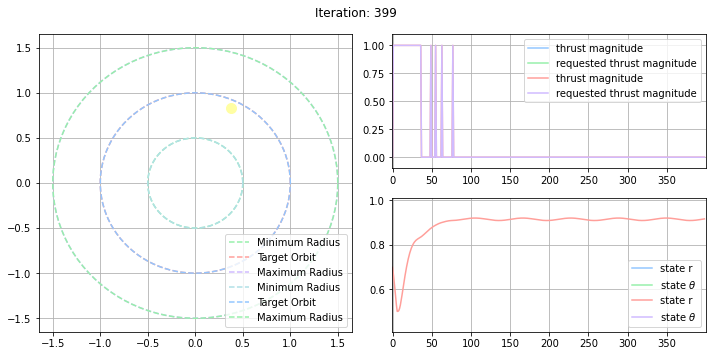

In [7]:
with rocket_gym.make('RocketCircularization-v0') as env:
    env = rocket_gym.PolarizeObservation(
        rocket_gym.TangentialThrust(
            rocket_gym.PolarizeAction(env)))
    model.load(model_name)
    model.simulate(env, render=True, evaluation=True, path='test.mp4')

In [8]:
import plotly.graph_objects as go

rm, rdtm, tdtm = np.mgrid[.5:1.5:40j, -.5:.5:40j, .5:1.5:40j]

# ellipsoid
inputs = np.hstack(
   (rm.reshape(-1, 1), rdtm.reshape(-1, 1), tdtm.reshape(-1, 1)))
# action = tf.reshape(tf.argmax(model.q_net(inputs), axis=-1), (100, 100, 100))
# value = tf.reshape(tf.reduce_max(model.q_net(inputs), axis=-1), (100, 100, 100))
action = tf.argmax(model.q_net(inputs), axis=-1)
value = tf.reduce_max(model.q_net(inputs), axis=-1)

fig = go.Figure(data=go.Isosurface(
    x=rm.flatten(),
    y=rdtm.flatten(),
    z=tdtm.flatten(),
    # value=(action - 1).numpy().flatten(),
    value=value.numpy().flatten(),
    isomin=-20,
    isomax=1,
    surface_count=10, # number of isosurfaces, 2 by default: only min and max
    colorbar_nticks=5, # colorbar ticks correspond to isosurface values
    caps=dict(x_show=False, y_show=False)
    ))

fig.update_layout(scene=dict(
    xaxis_title='Radius',
    yaxis_title='Radial Velocity',
    zaxis_title='Tangential Velocity'))
fig.show()
